<a href="https://colab.research.google.com/github/thranathi17/dsem_dataset/blob/main/Assignment_1_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT License

Copyright (c) 2023 Thranathi Reddy Chada

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **Abstract**

This dataset comprises comprehensive information about various hotels and properties, including their location, amenities, guest recommendations, and reviews. It offers insights into the hospitality industry, aiding in market analysis, and trend identification. Researchers can explore the correlations between hotel facilities, room types, and guest recommendations, contributing to better understanding traveler preferences.Moreover, the dataset enables property-specific investigations, helping businesses enhance their offerings based on site review ratings.

# **Variable Description**

Address: The physical address of the hotel, including street name, number, and any other relevant details.

Area: The sub-city region where the hotel is located geographically.

city: The city where the hotel is located.

guest_recommendation: The number of guests who have stayed at this hotel and recommended it to others on the website.

latitude: The geographical latitude of the hotel's location.

longitude: The geographical longitude of the hotel's location.

property_id: A unique identifier assigned to the hotel.

property_name: The name of the hotel.

property_type: The type of property, which is typically a hotel.

room_count: The total number of rooms available for guests at the hotel.

room_type: The type of room available for guests at the hotel.

site_review_count: The number of reviews left on the website by users for this hotel.

site_review_rating: The overall rating given by users for this hotel on the website.

state: The state or province where the hotel is located.

uniq_id: A unique identifier assigned to each hotel on the website.

# **Aim**:

In this assignment we aim to create a complete ML project with go-ibibo dataset

Checking Data Quality and Feature Selection



## 1. What is the question?

Ans:

## **ML Data Cleaning and Feature Selection**

In [1]:
#installing dependencies
!pip install eli5
!pip install fitter
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=46e371889faf588fa148c3c591de500c4e8aa34d9b5b40de91dc330a7310f5b5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 18.3 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import warnings
warnings.filterwarnings('ignore')

shap.initjs()

# Figure Size
plt.figure(figsize=(18, 14), dpi=80)
sns.set(rc={"figure.figsize": (18, 14)})

# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN


sns.set(rc={"figure.figsize": (16, 8)})

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=ecfe7bf289385b447a4aba6eb6c5e52bb06a4c115ae1770f4bf75273b57eb90c
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=9c50f10a34747d15aa6ef7e6fc9248cef046e2585484d432e93cf1f0d4115606
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


<Figure size 1440x1120 with 0 Axes>

In [3]:
#Reading the hotel on Goibibo dataset
data = pd.read_csv("https://raw.githubusercontent.com/thranathi17/dsem_dataset/main/goibibo_com-travel_new.csv")

In [4]:
#Viewing data in the file
data.head()

address            area     city  \
0  15th Mile, N.H.21,Manali, District Kullu,Himac...          Others   Manali   
1  A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...     Sushant Lok  Gurgaon   
2  Cobra Vaddo,Calungate Baga Road, Bardez, Calan...  Calangute Area      Goa   
3                                              Simsa   Village Simsa   Manali   
4         8180 Street No.-6,Arakashan Road,Paharganj       Paharganj    Delhi   

   guest_recommendation                                  hotel_description  \
0                    85  The standard check-in time is 12:00 PM and the...   
1                    87  The standard check-in time is 12:00 PM and the...   
2                    50  The standard check-in time is 12:00 PM and the...   
3                   100  The standard check-in time is 12:00 PM and the...   
4                    63  The standard check-in time is 12:00 PM and the...   

                                    hotel_facilities   latitude  \
0  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.139387   
1  Airport Transfer Available / Surcharge|Banquet...  28.472097   
2  Swimming Pool|Bar / Lounge |Laundry Service Av...  15.548398   
3  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.223603   
4  Internet Access - Surcharge|Laundry Service Av...  28.646777   

         locality  longitude       property_id        property_name  \
0          Others  77.154660  HTLGBO1000016238     Baragarh Regency   
1     Sushant Lok  77.072546  HTLGBO1000015822  Asian Suites A- 585   
2  Calangute Area  73.757634  HTLGBO1000004551        Bevvan Resort   
3   Village Simsa  77.185900  HTLGBO1000007993    Apple Inn Cottage   
4       Paharganj  77.212735  HTLGBO1000008281  Anmol Hotel Pvt.Ltd   

  property_type province  room_count                   room_type  \
0        Resort   Manali          17                 Deluxe Room   
1   Guest House  Gurgaon          18  Deluxe Room With Free WIFI   
2        Resort      Goa          15               Standard Room   
3       Cottage   Manali          24                 Deluxe Room   
4         Hotel    Delhi          20        Standard Room Non AC   

   site_review_count  site_review_rating             state  \
0                 87                 4.0  Himachal Pradesh   
1                  8                 4.5           Haryana   
2                  2                 2.5               Goa   
3                  1                 5.0  Himachal Pradesh   
4                121                 2.8             Delhi   

                            uniq_id  
0  2c8db027d43a9452a43e88eb30d9f983  
1  e98f69f889c0235e6dc480e7df6de0de  
2  9b59d00eaffc273d83000ed7dcda0e83  
3  df0971f9c5501af112485ee28b468ce5  
4  0c3514344c9cda8718f558e84bdb44ef

In [5]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("\n")
print("Numerical Columns : ", numerical_columns)


Categorical Columns :  ['address', 'area', 'city', 'hotel_description', 'hotel_facilities', 'locality', 'property_id', 'property_name', 'property_type', 'province', 'room_type', 'state', 'uniq_id']


Numerical Columns :  ['guest_recommendation', 'latitude', 'longitude', 'room_count', 'site_review_count', 'site_review_rating']


## Q1 What are the data types? ( numeric and categorical)
Answer:  

Categorical Columns :  ['address', 'area', 'city', 'hotel_description', 'hotel_facilities', 'locality', 'property_id', 'property_name', 'property_type', 'province', 'room_type', 'state', 'uniq_id']


Numerical Columns :  ['guest_recommendation', 'latitude', 'longitude', 'room_count', 'site_review_count', 'site_review_rating']

In [6]:
num_cols = data._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['guest_recommendation', 'latitude', 'longitude', 'room_count',
        'site_review_count', 'site_review_rating'],
       dtype='object'),
 6)

In [7]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['address',
  'area',
  'city',
  'hotel_description',
  'hotel_facilities',
  'locality',
  'property_id',
  'property_name',
  'property_type',
  'province',
  'room_type',
  'state',
  'uniq_id'],
 13)

In [8]:
#checking if the any data is missing
data.isnull().sum()

address                 0
area                    0
city                    0
guest_recommendation    0
hotel_description       0
hotel_facilities        0
latitude                0
locality                0
longitude               0
property_id             0
property_name           0
property_type           0
province                0
room_count              0
room_type               0
site_review_count       0
site_review_rating      0
state                   0
uniq_id                 0
dtype: int64

In [9]:
data.shape

(2302, 19)

## Q2 Are there missing values?
Answer: As it can be seen, no data is missing from any of the columns, which means it is not required to impute or remove the null values from the data. However, to meet the matrix requiremnt, imputation is performaed in the later parts of the notebook.

In [10]:
# converting
for cat_col in cat_cols:
  classes = list(np.unique(data[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  data[cat_col].replace(classes, tokens, inplace=True)

In [11]:
data.describe()

address         area         city  guest_recommendation  \
count  2302.000000  2302.000000  2302.000000           2302.000000   
mean   1148.859687   448.908341   164.575586             75.976977   
std     663.245513   258.398243   102.630416             22.060363   
min       0.000000     0.000000     0.000000              0.000000   
25%     575.250000   211.000000    86.000000             68.000000   
50%    1149.500000   460.000000   143.000000             80.000000   
75%    1722.750000   639.750000   248.000000             90.000000   
max    2297.000000   918.000000   361.000000            100.000000   

       hotel_description  hotel_facilities     latitude     locality  \
count        2302.000000       2302.000000  2302.000000  2302.000000   
mean          716.264553       1121.462641    21.477707   448.908341   
std           366.671713        636.455640     7.543358   258.398243   
min             0.000000          0.000000     8.080476     0.000000   
25%           429.000000        573.250000    15.208563   211.000000   
50%           723.000000       1139.500000    22.516101   460.000000   
75%          1017.000000       1657.750000    28.443529   639.750000   
max          1370.000000       2228.000000    79.464811   918.000000   

         longitude  property_id  property_name  property_type     province  \
count  2302.000000  2302.000000    2302.000000    2302.000000  2302.000000   
mean     77.385076  1150.500000    1093.726325       8.735882   164.575586   
std       4.477159   664.674482     624.362846       2.687507   102.630416   
min      12.939682     0.000000       0.000000       0.000000     0.000000   
25%      74.640032   575.250000     571.250000       8.000000    86.000000   
50%      77.056976  1150.500000    1075.500000       8.000000   143.000000   
75%      78.154690  1725.750000    1631.750000       8.000000   248.000000   
max      94.911962  2301.000000    2197.000000      16.000000   361.000000   

        room_count    room_type  site_review_count  site_review_rating  \
count  2302.000000  2302.000000        2302.000000         2302.000000   
mean     29.614683   418.634666          48.876195            3.769983   
std     125.602858   231.087313          94.350157            0.819890   
min       0.000000     0.000000           0.000000            0.000000   
25%      10.000000   241.000000           4.000000            3.400000   
50%      20.000000   380.000000          17.000000            4.000000   
75%      32.750000   671.750000          57.000000            4.300000   
max    5874.000000   834.000000        2094.000000            5.000000   

             state      uniq_id  
count  2302.000000  2302.000000  
mean     14.800174  1150.500000  
std       6.906845   664.674482  
min       0.000000     0.000000  
25%       9.000000   575.250000  
50%      14.000000  1150.500000  
75%      21.000000  1725.750000  
max      26.000000  2301.000000

### Q3 What are the likely distributions of the numeric variables?
Answer : Presented below is a "random distribution" of numerical data.

<Figure size 800x500 with 0 Axes>

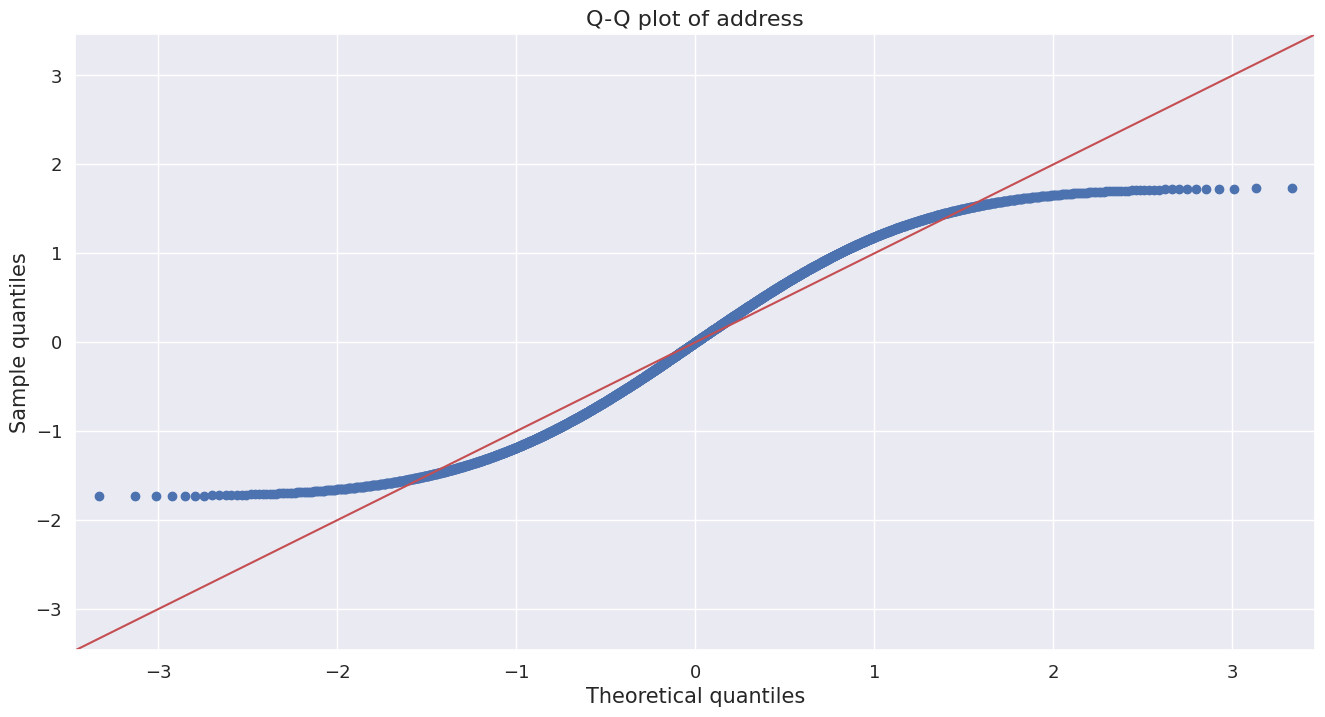

<Figure size 800x500 with 0 Axes>

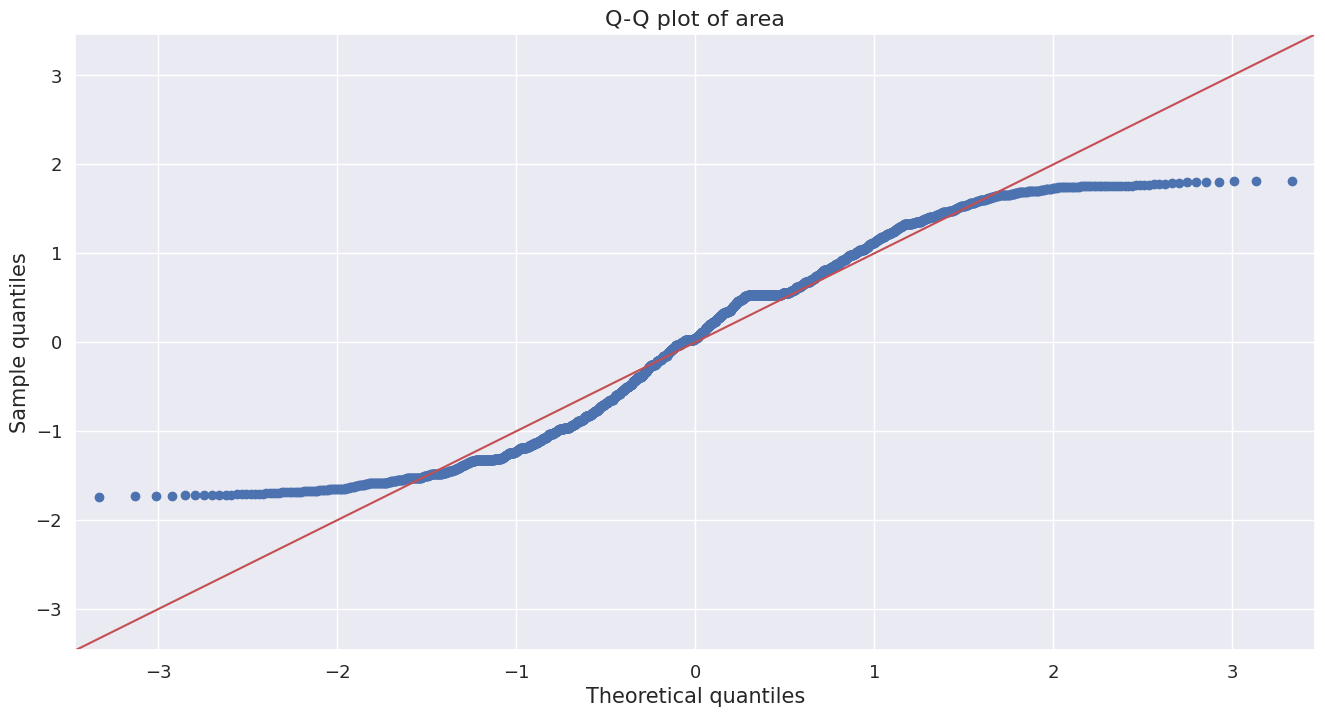

<Figure size 800x500 with 0 Axes>

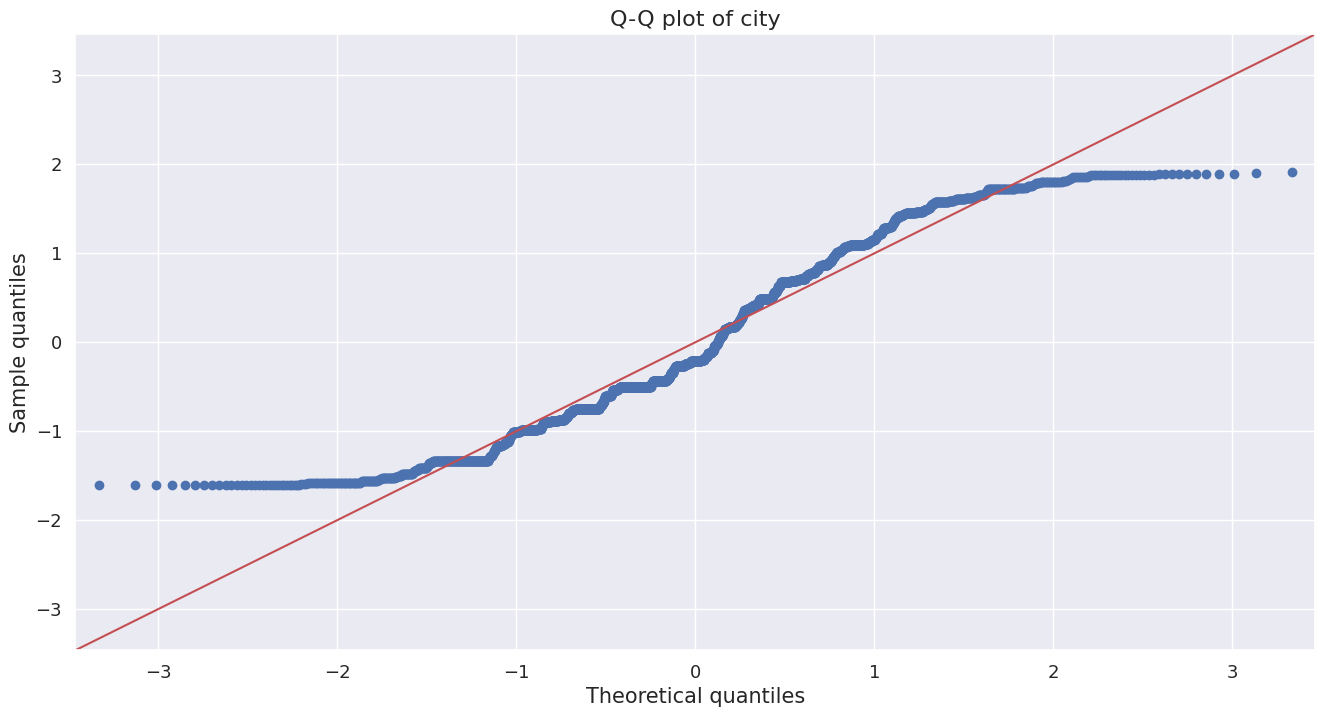

<Figure size 800x500 with 0 Axes>

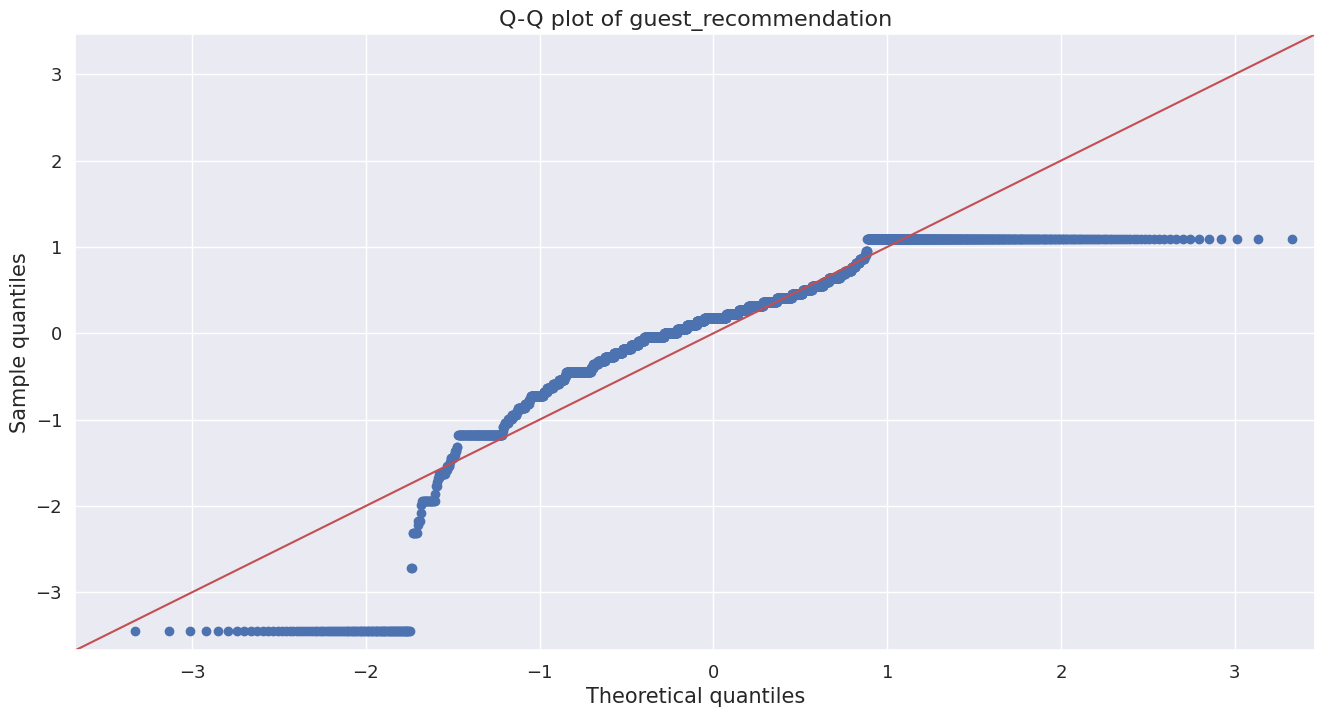

<Figure size 800x500 with 0 Axes>

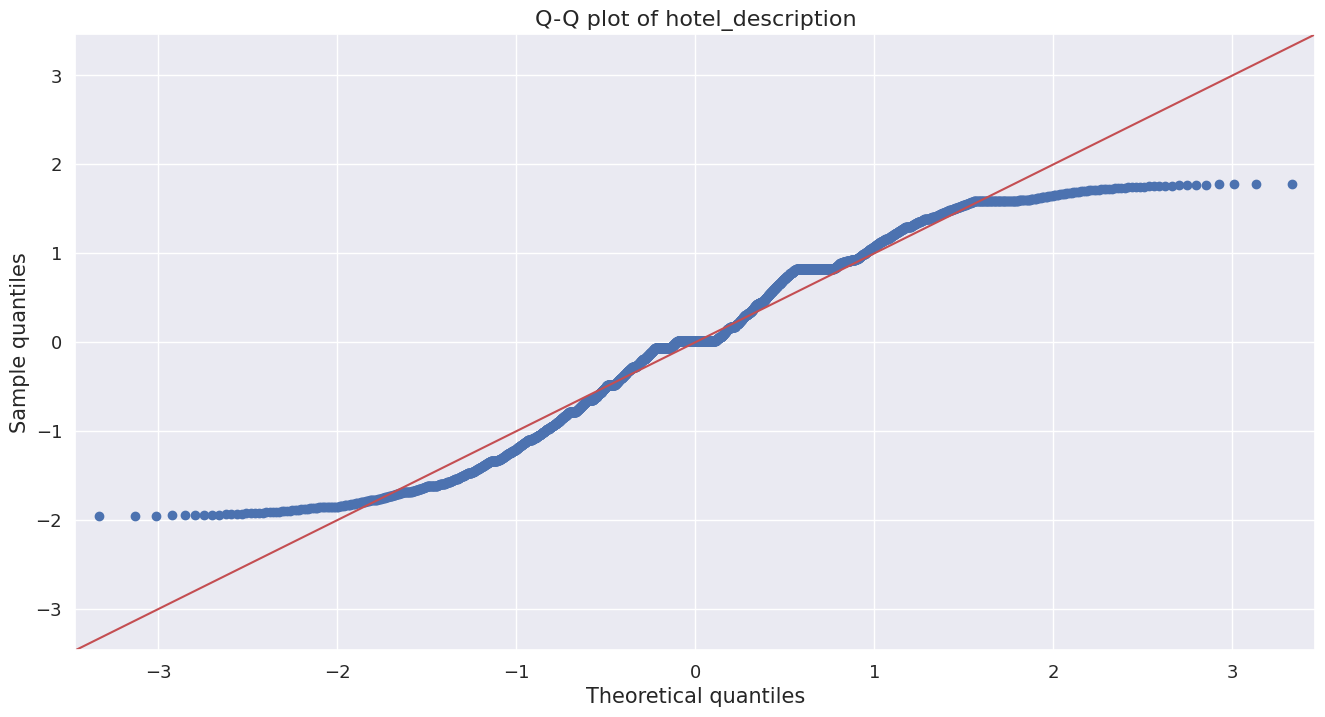

<Figure size 800x500 with 0 Axes>

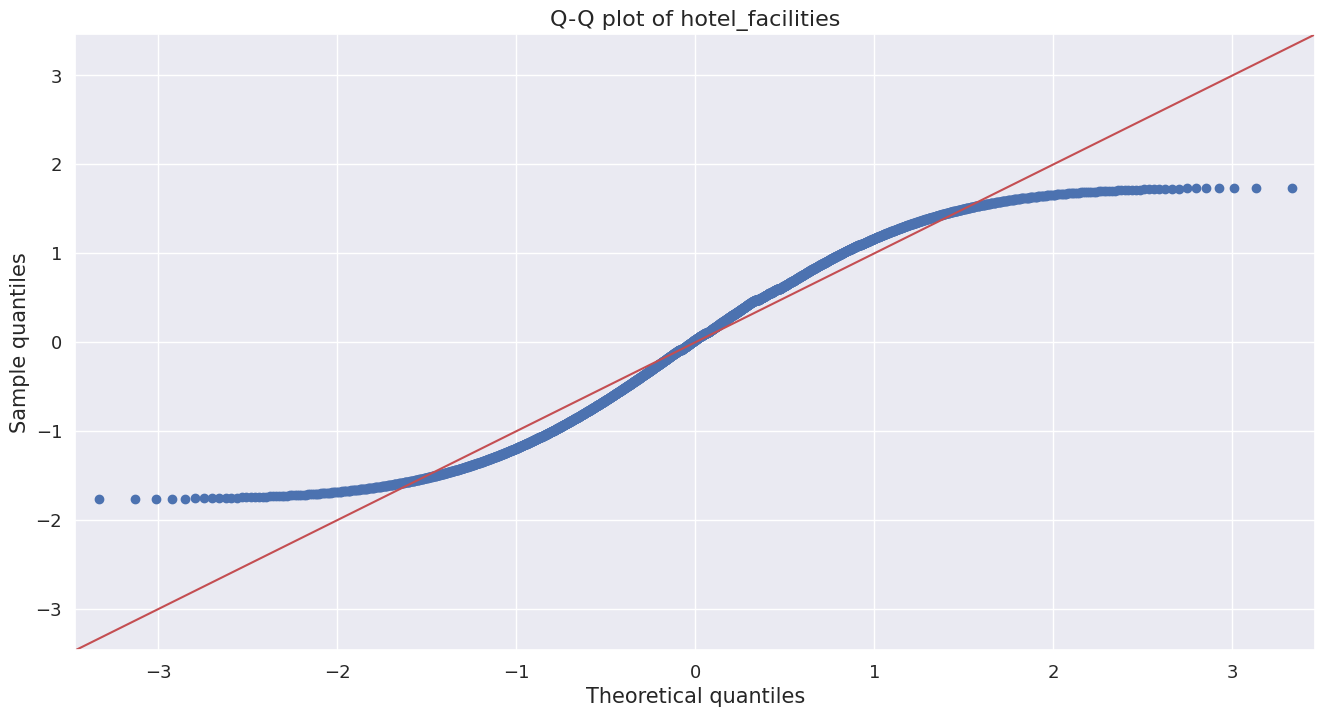

<Figure size 800x500 with 0 Axes>

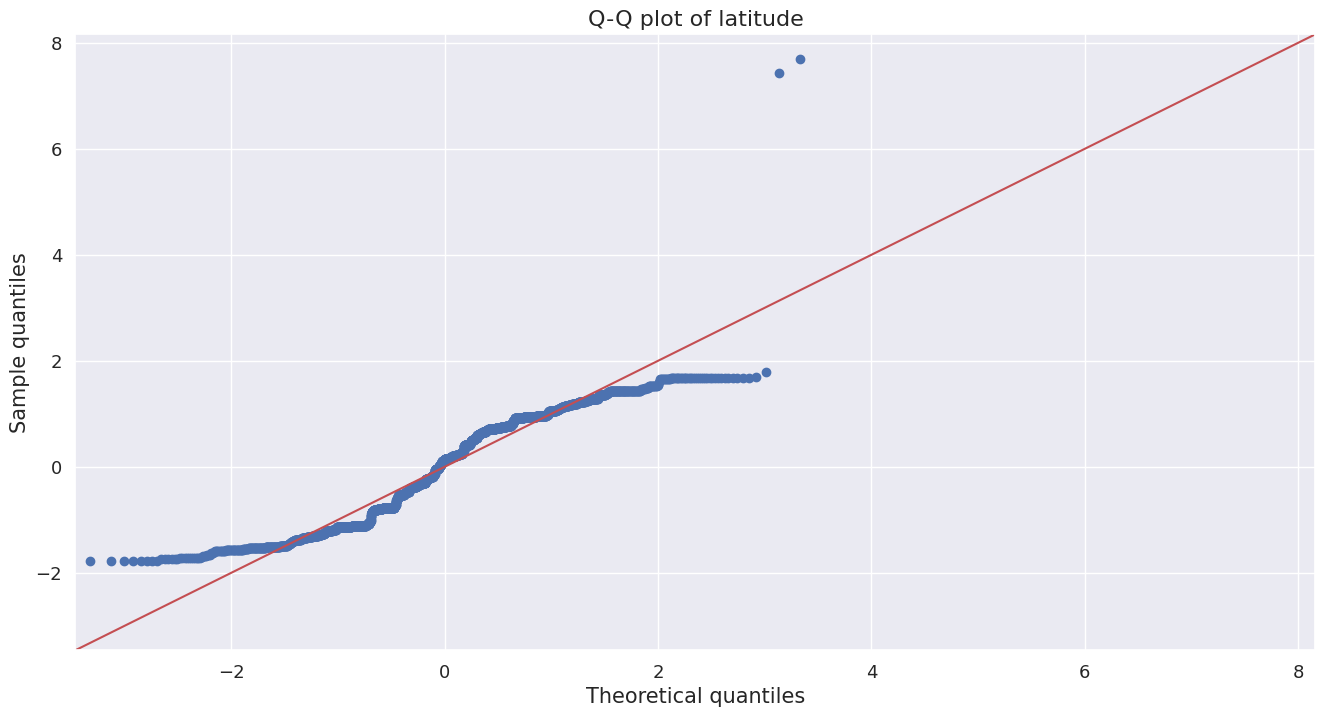

<Figure size 800x500 with 0 Axes>

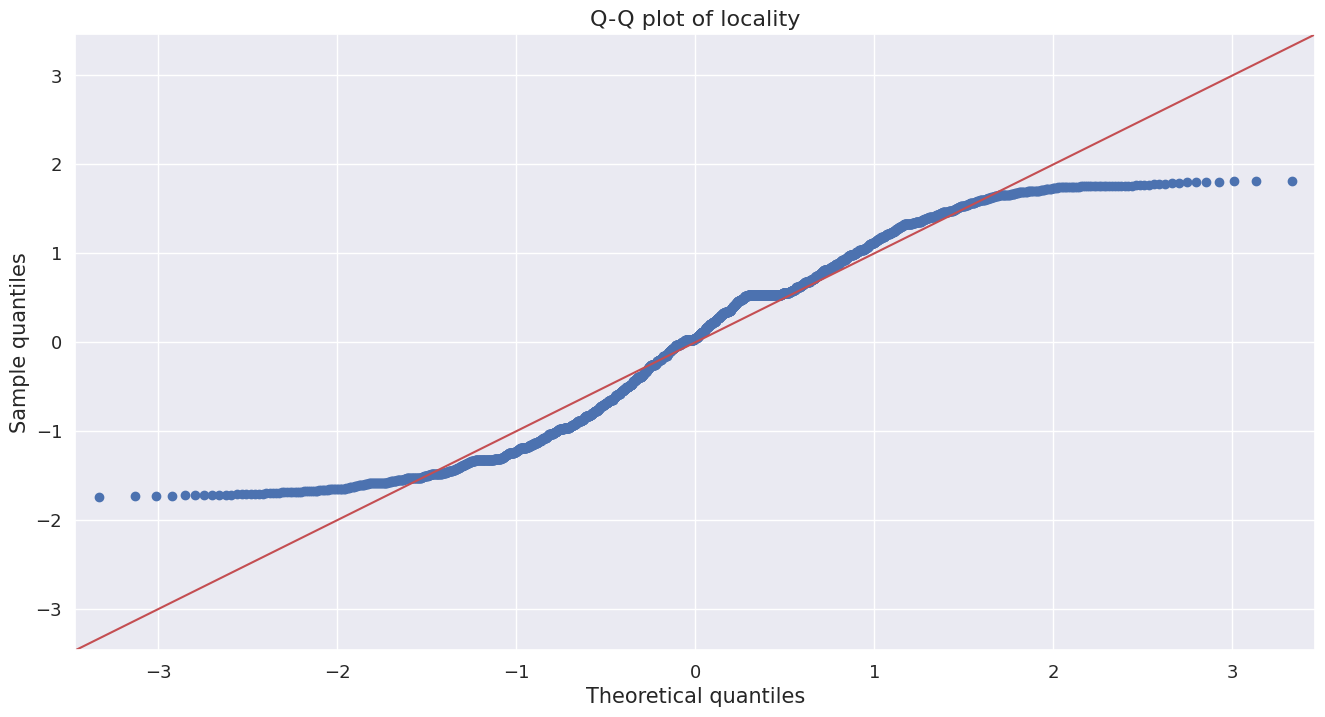

<Figure size 800x500 with 0 Axes>

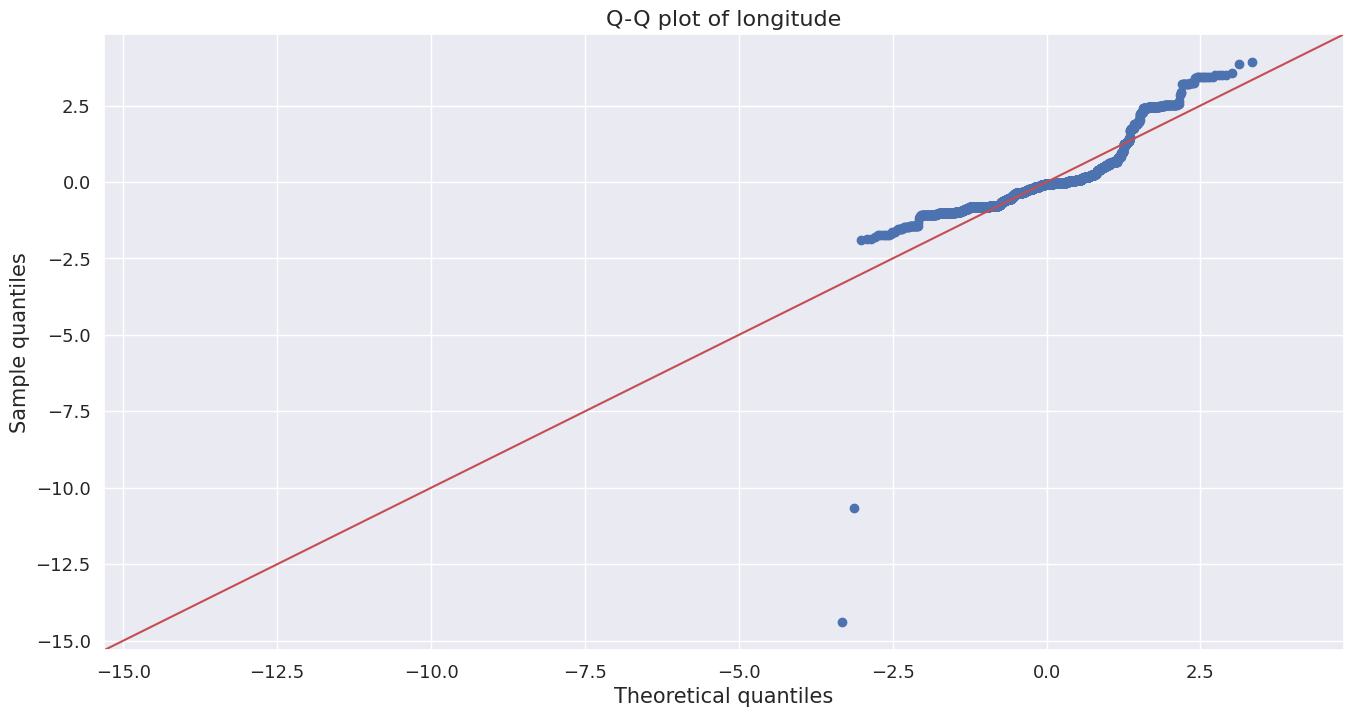

<Figure size 800x500 with 0 Axes>

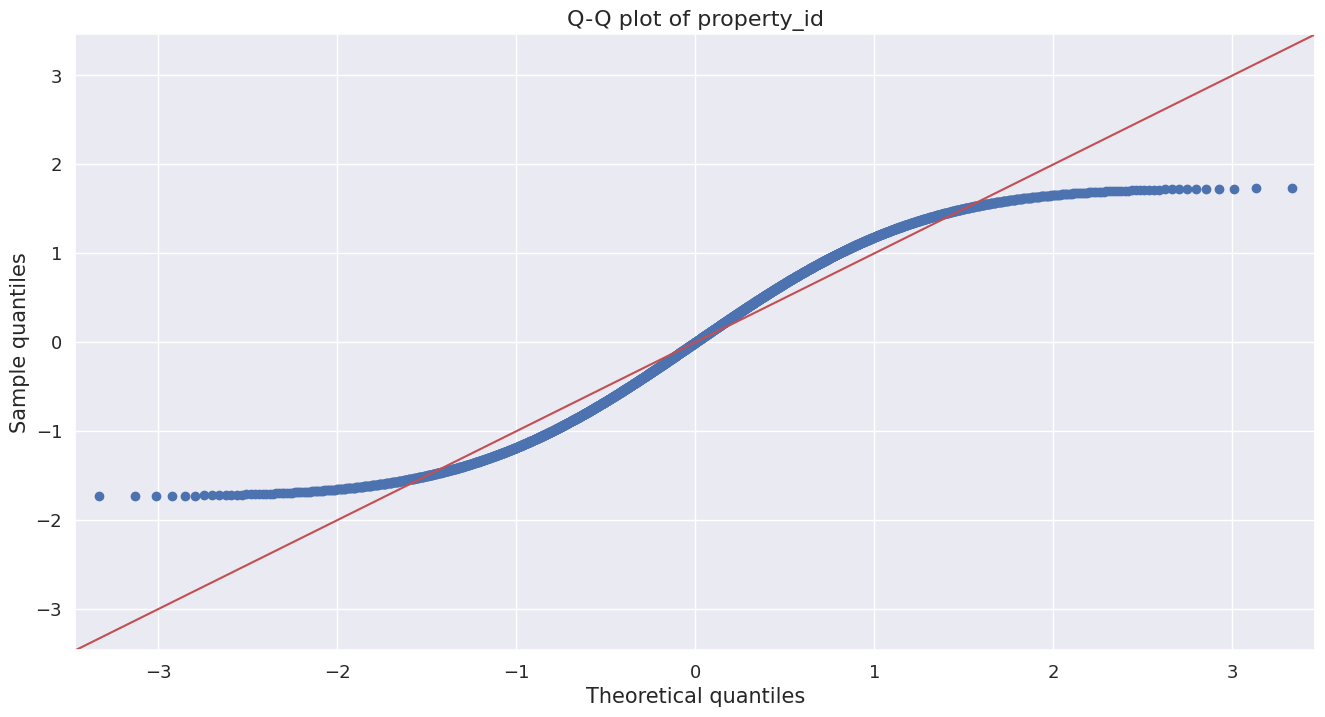

<Figure size 800x500 with 0 Axes>

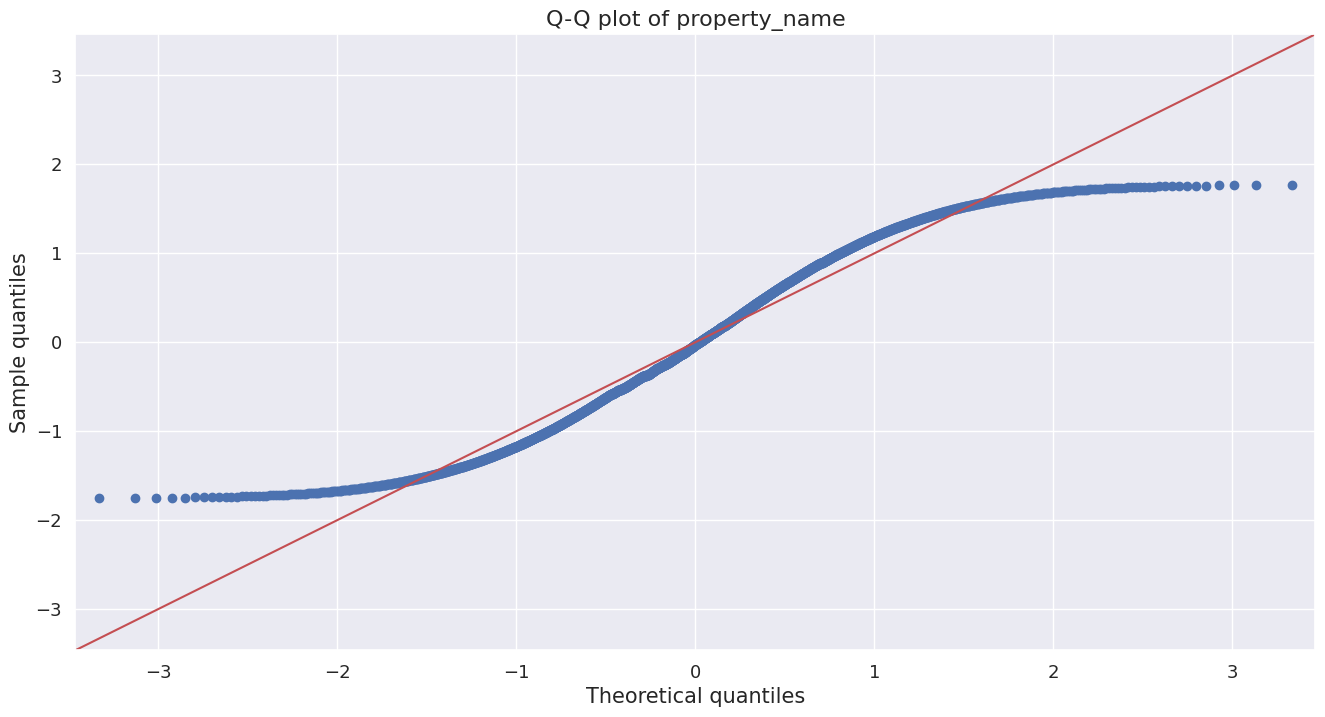

<Figure size 800x500 with 0 Axes>

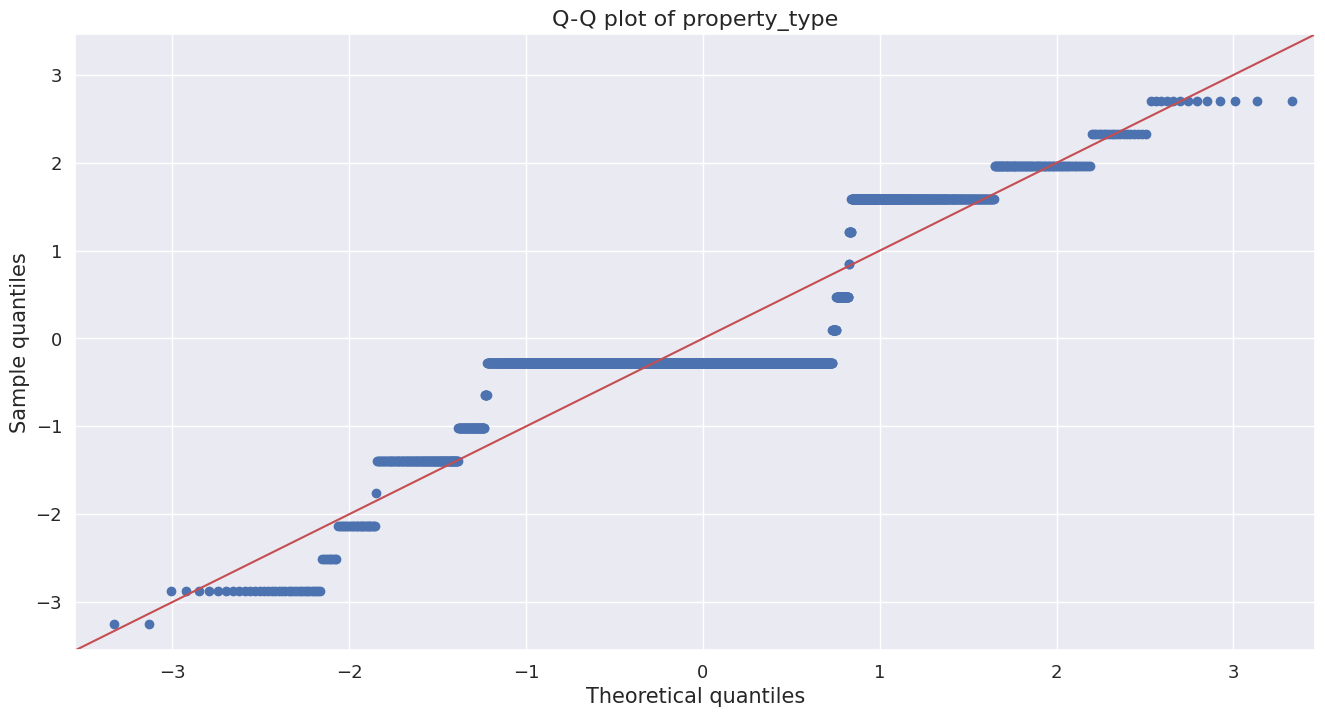

<Figure size 800x500 with 0 Axes>

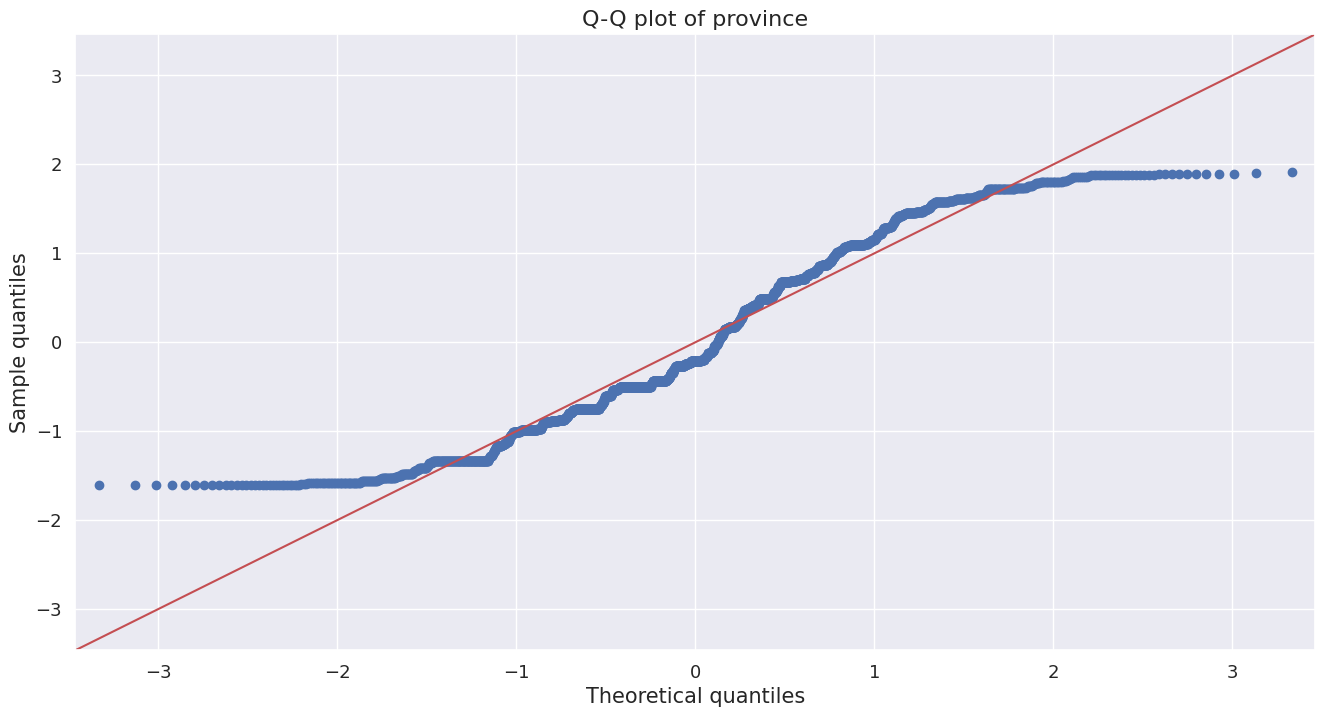

<Figure size 800x500 with 0 Axes>

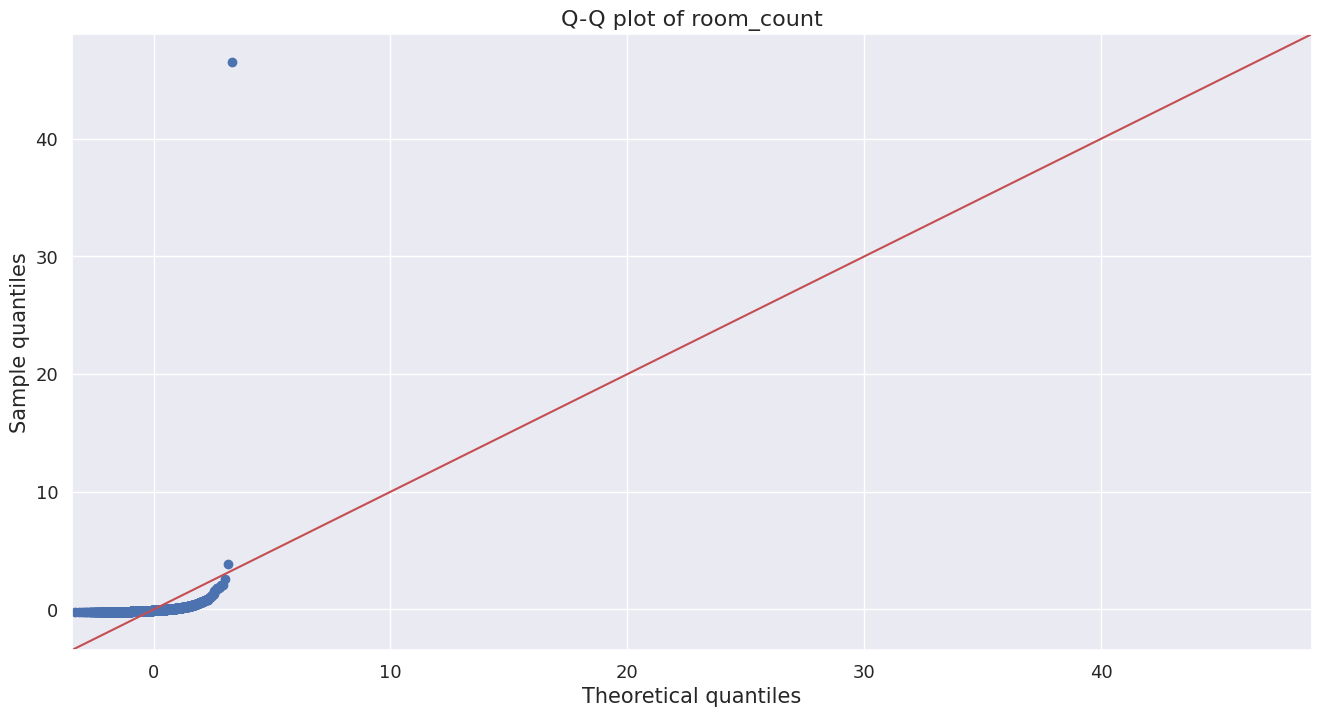

<Figure size 800x500 with 0 Axes>

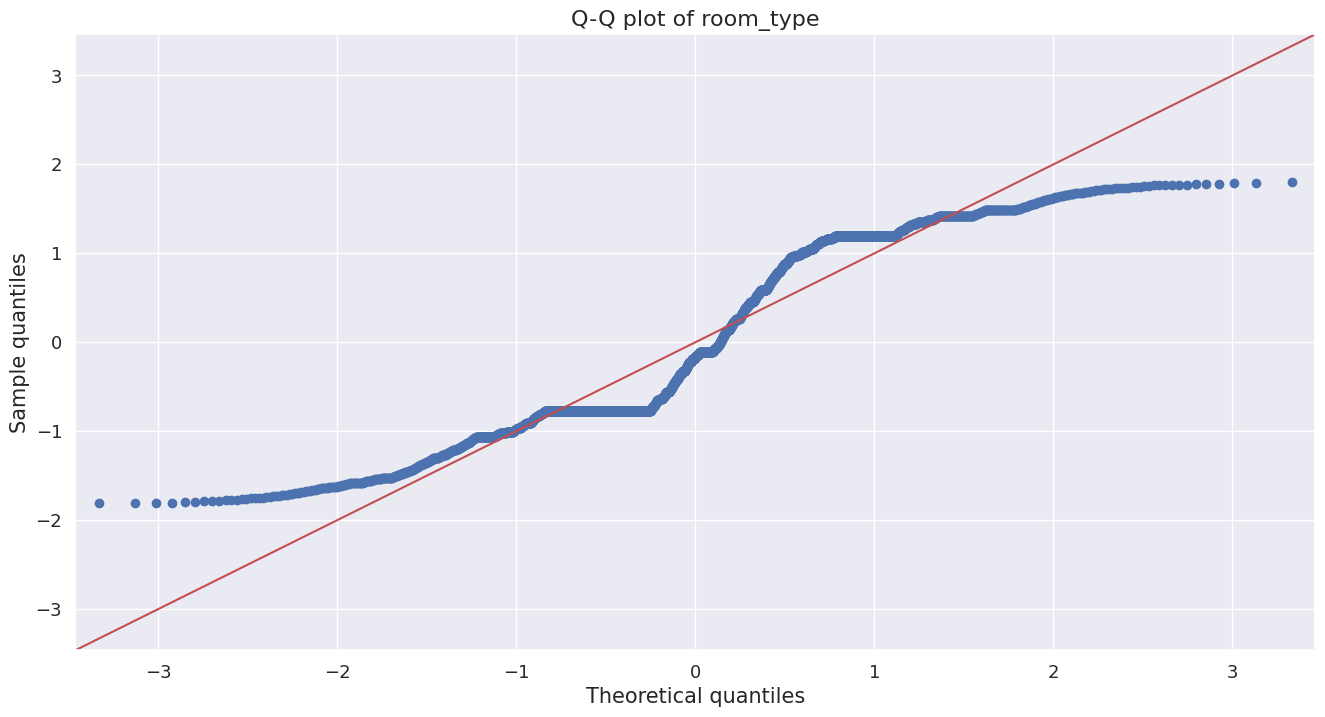

<Figure size 800x500 with 0 Axes>

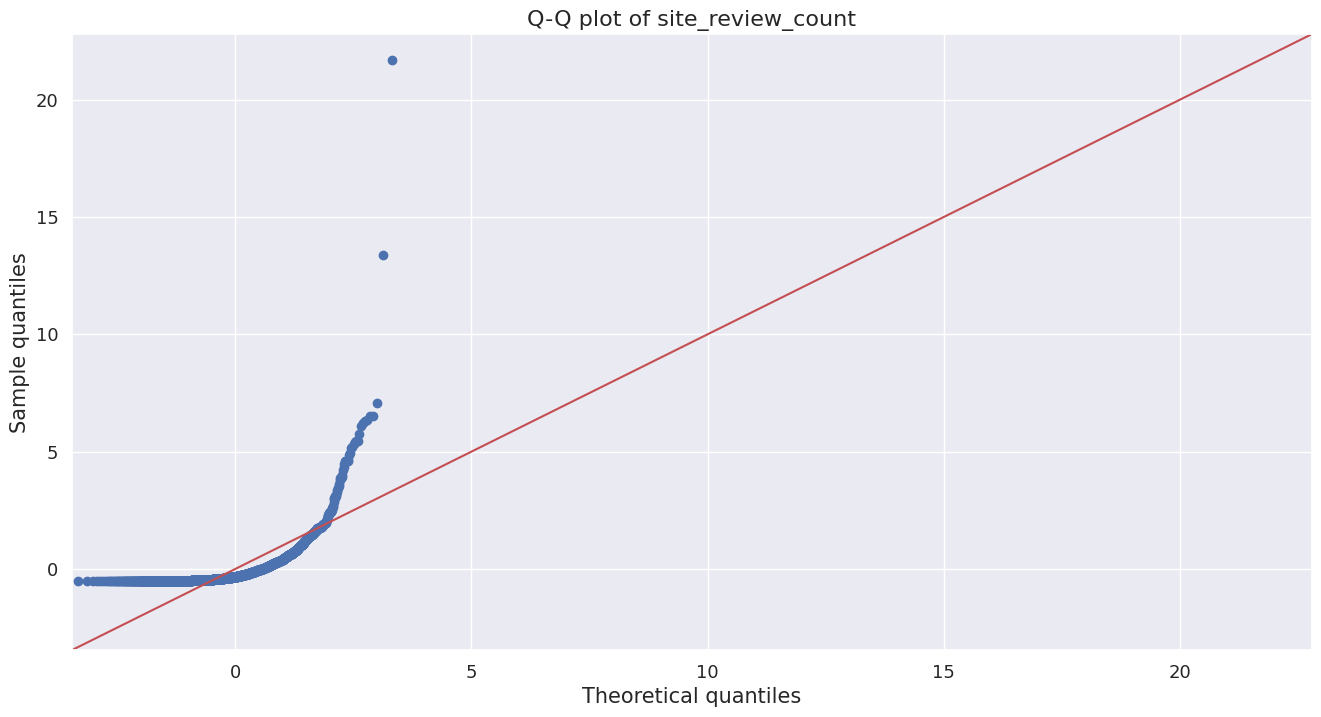

<Figure size 800x500 with 0 Axes>

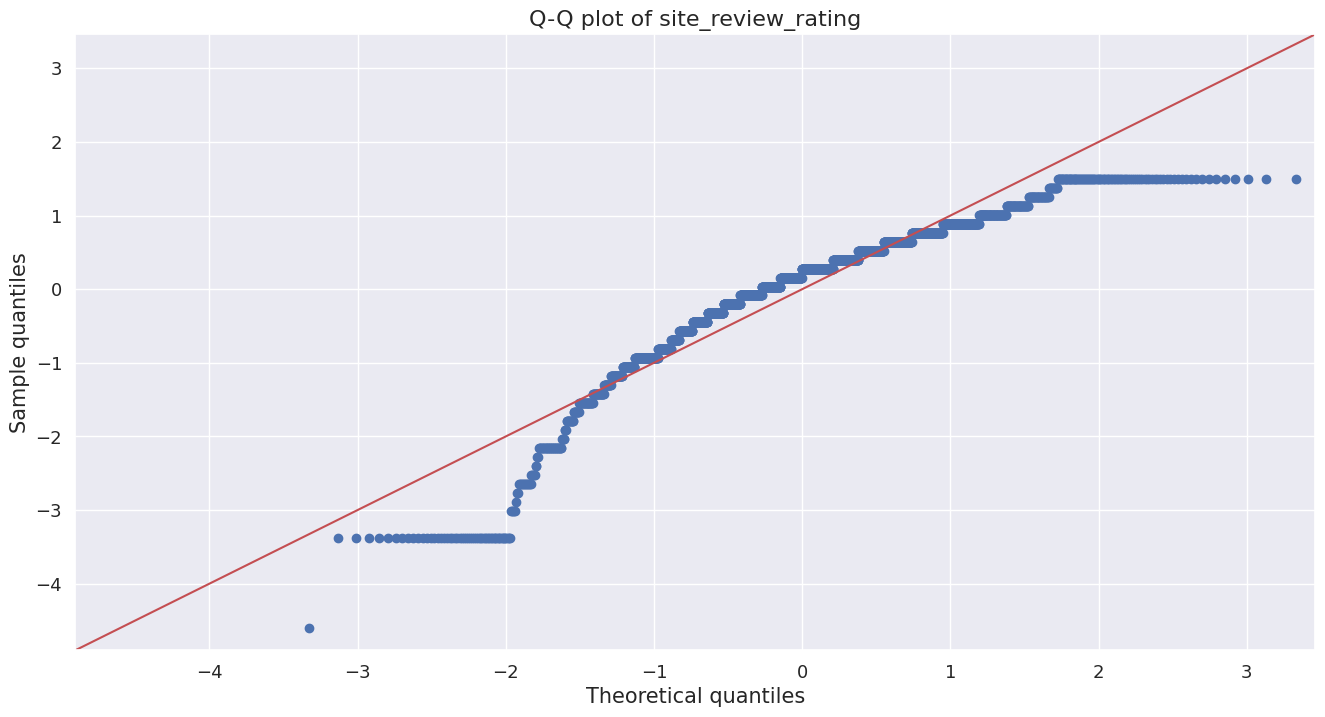

<Figure size 800x500 with 0 Axes>

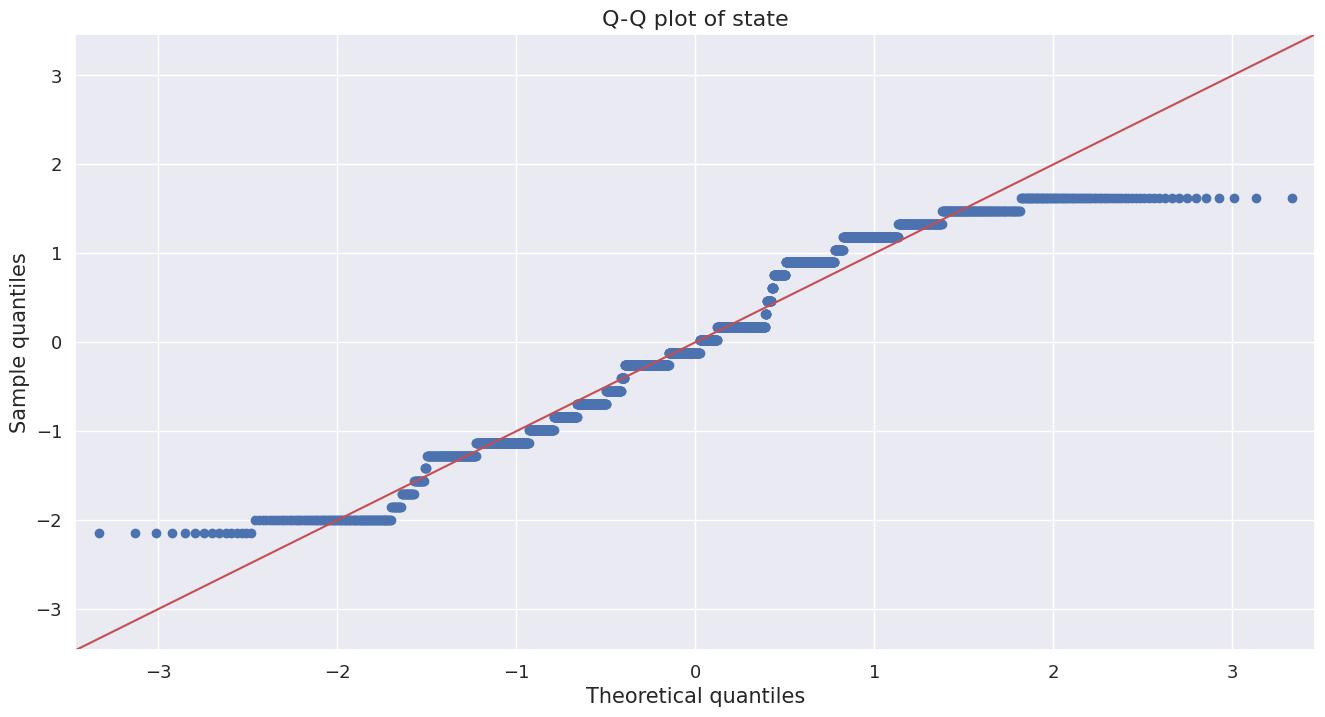

<Figure size 800x500 with 0 Axes>

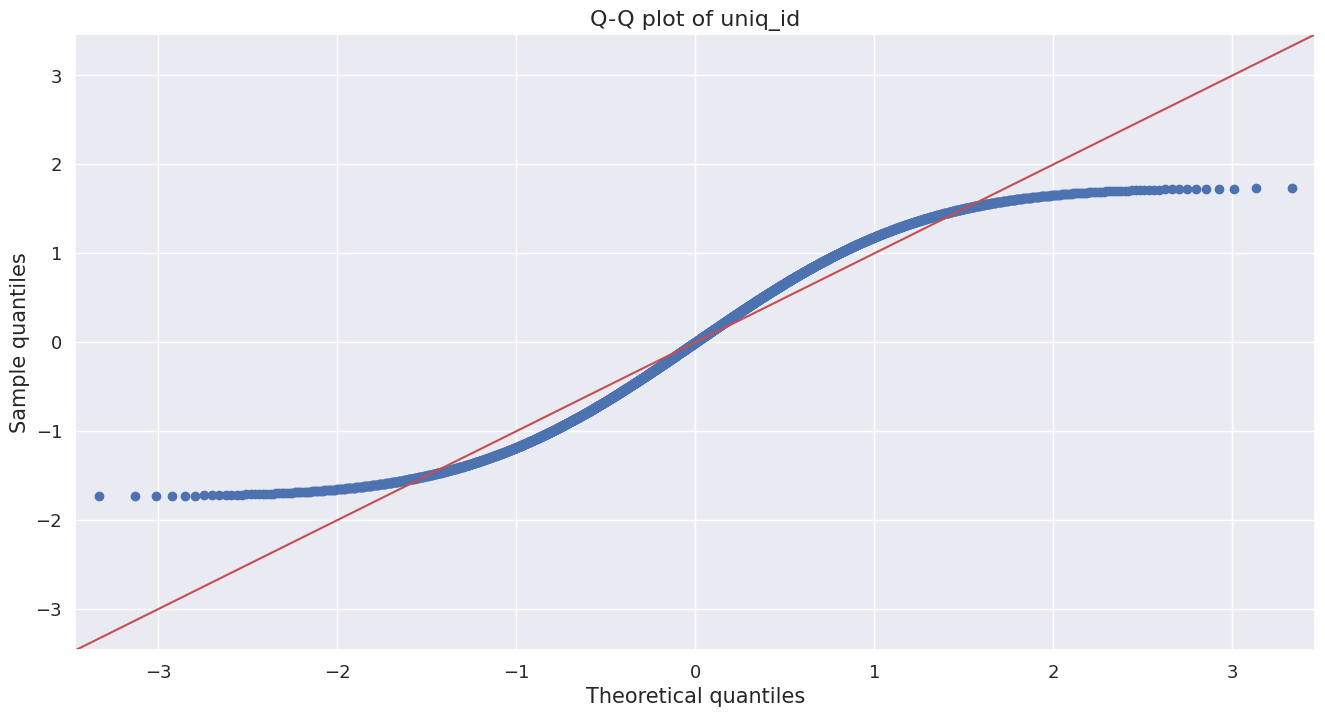

In [12]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm=data[['address', 'area', 'city', 'guest_recommendation', 'hotel_description', 'hotel_facilities', 'latitude', 'locality', 'longitude', 'property_id', 'property_name', 'property_type', 'province', 'room_count', 'room_type', 'site_review_count', 'site_review_rating', 'state', 'uniq_id']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

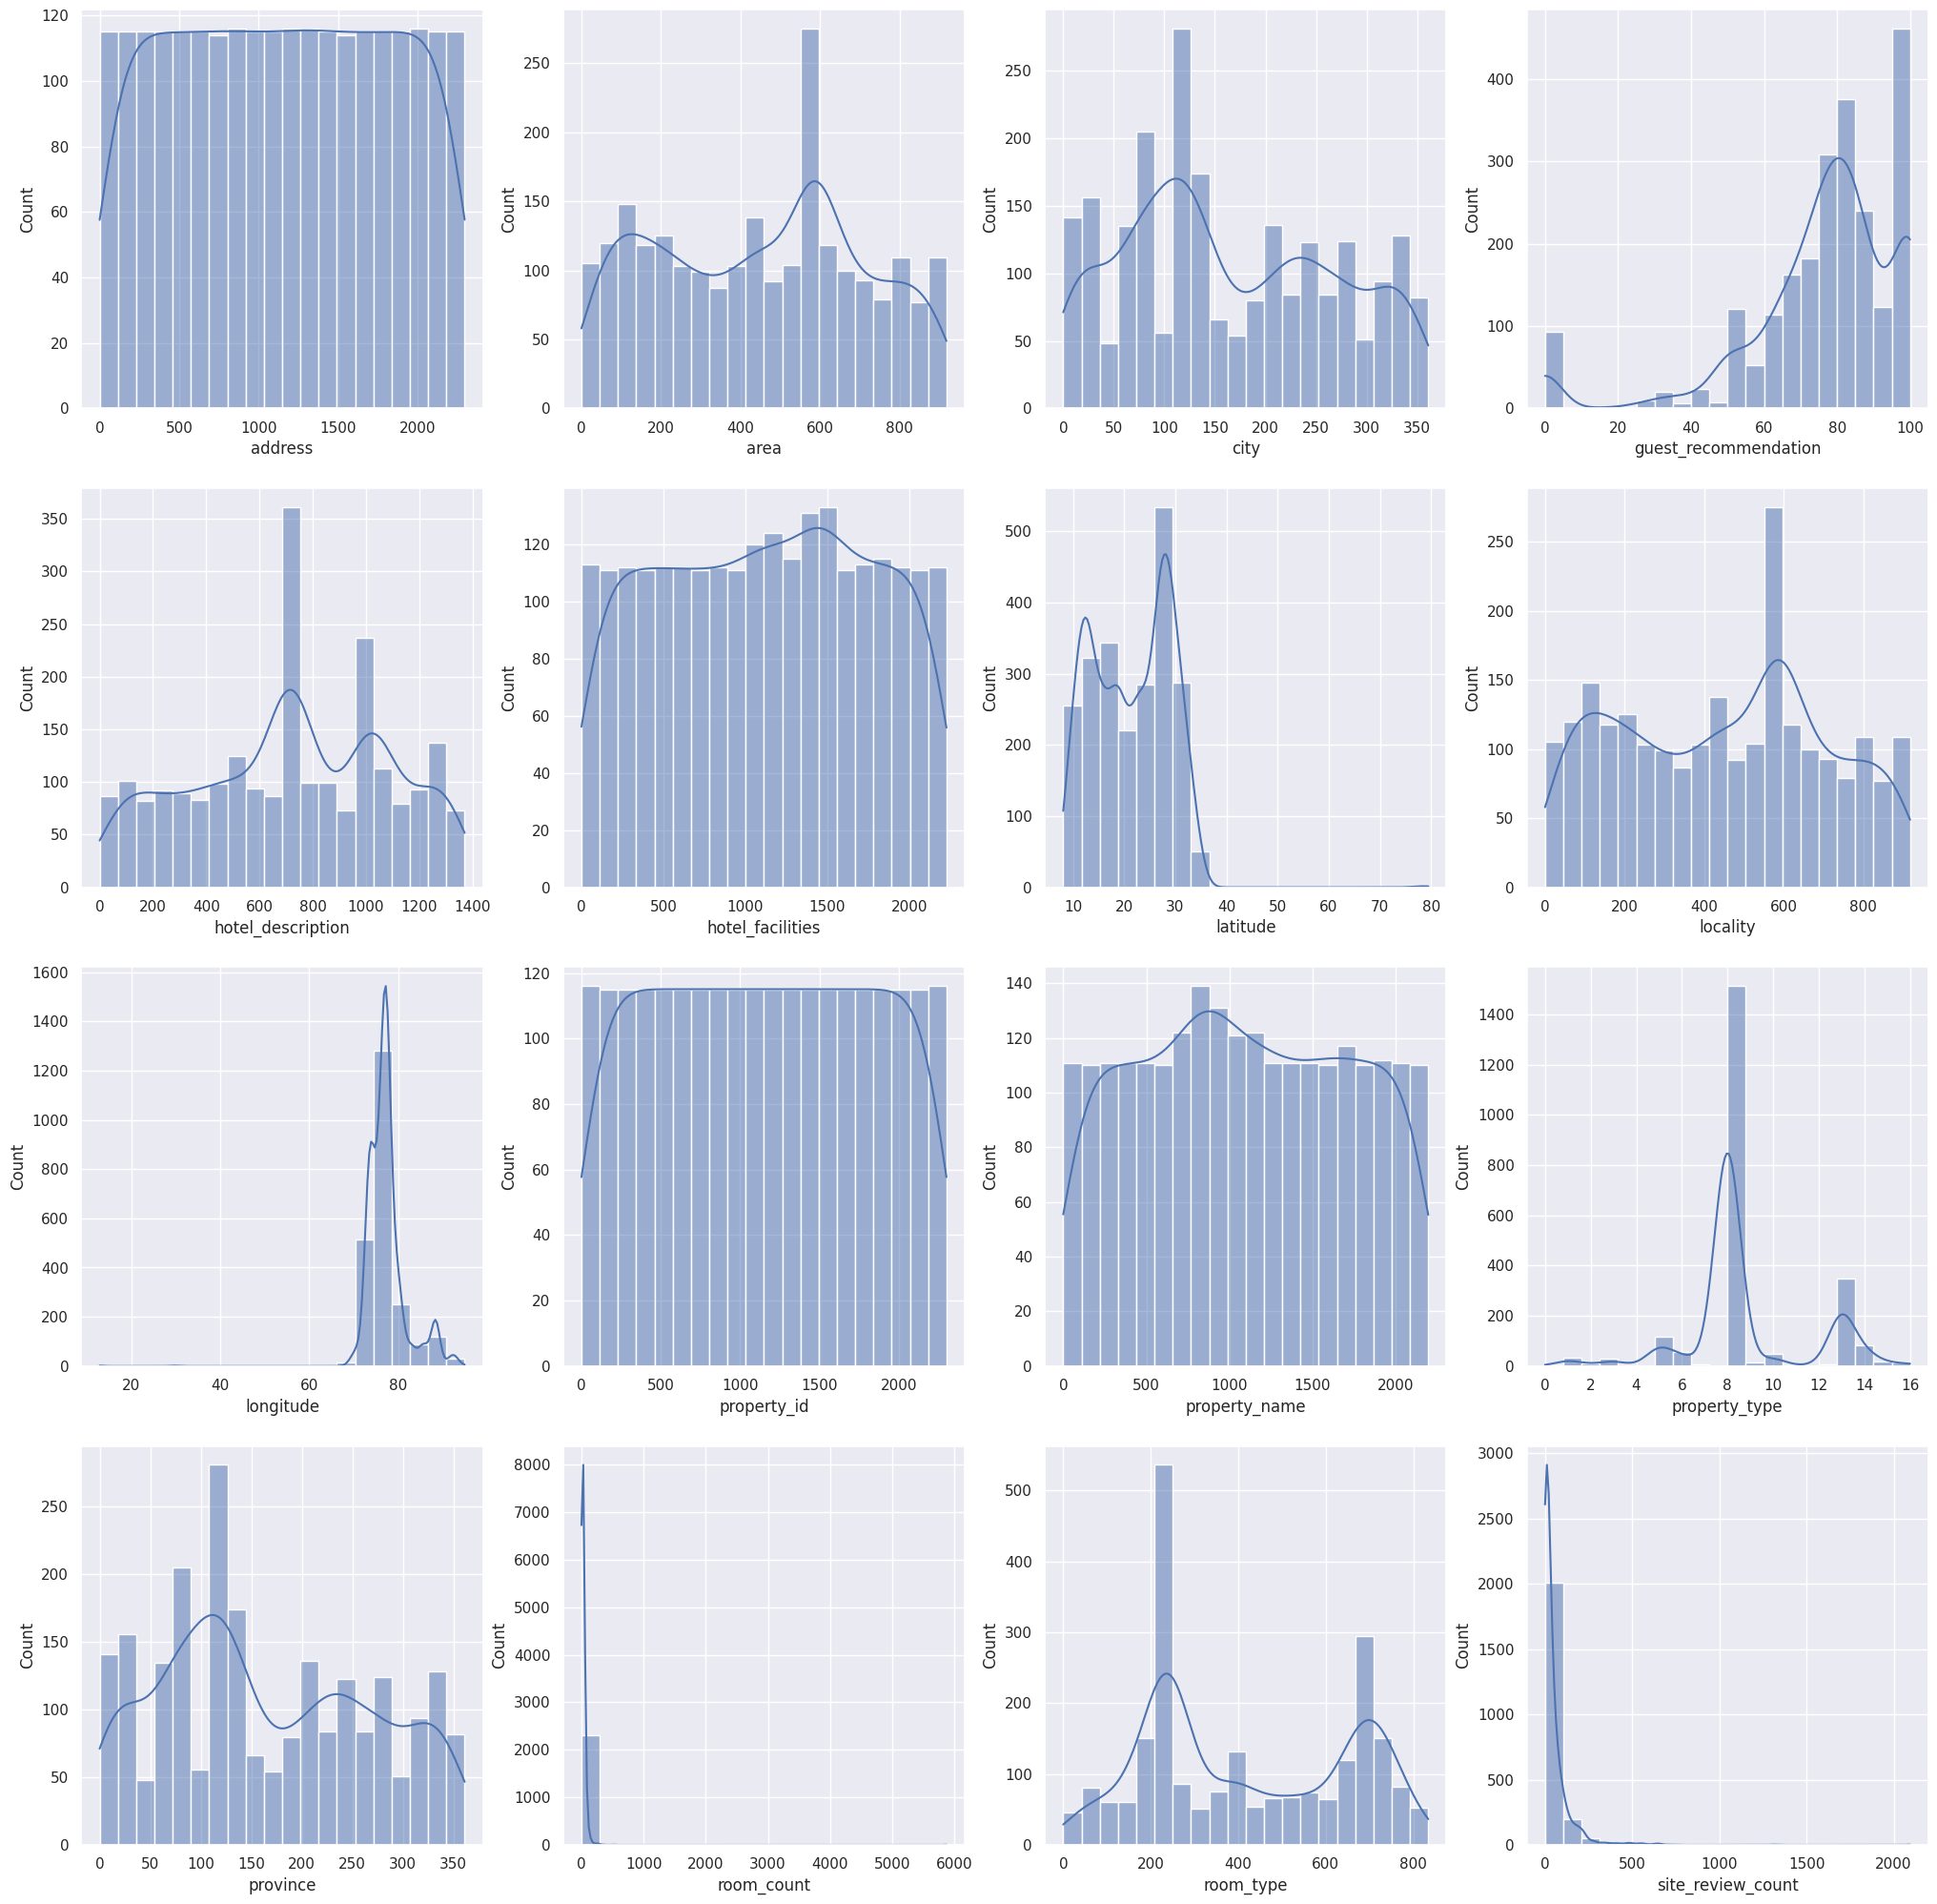

In [13]:
# 3
cols = data.columns
# print(len(cols))

sns.set(rc={"figure.figsize": (25, 25)})

for i in range(min(len(cols)-1, 16)):
  plt.subplot(4,4,i+1)
  ax = sns.histplot(x = data[cols[i]],kde=True,bins=20)



## Q9 Do ranges of predictor variable make sense:
No, as can be seen from the df.describe() code above, some predictors have a wide range, while others have a maximum value of less than 0.02.Hence the dataset has been normalized.

In [14]:
# Normalizing the data in the columns beacuse the value is too high when compared to other independent variable

#from sklearn import preprocessing

target = data['site_review_rating']
#data_norm = pd.DataFrame(data = x_scaled, columns=data.drop(columns=['site_review_rating']).columns)
data_norm['site_review_rating']=target

In [15]:
#As the ranges were diferent. Below is the output after normalizing the dataset.
data_norm.describe()

address         area         city  guest_recommendation  \
count  2302.000000  2302.000000  2302.000000           2302.000000   
mean   1148.859687   448.908341   164.575586             75.976977   
std     663.245513   258.398243   102.630416             22.060363   
min       0.000000     0.000000     0.000000              0.000000   
25%     575.250000   211.000000    86.000000             68.000000   
50%    1149.500000   460.000000   143.000000             80.000000   
75%    1722.750000   639.750000   248.000000             90.000000   
max    2297.000000   918.000000   361.000000            100.000000   

       hotel_description  hotel_facilities     latitude     locality  \
count        2302.000000       2302.000000  2302.000000  2302.000000   
mean          716.264553       1121.462641    21.477707   448.908341   
std           366.671713        636.455640     7.543358   258.398243   
min             0.000000          0.000000     8.080476     0.000000   
25%           429.000000        573.250000    15.208563   211.000000   
50%           723.000000       1139.500000    22.516101   460.000000   
75%          1017.000000       1657.750000    28.443529   639.750000   
max          1370.000000       2228.000000    79.464811   918.000000   

         longitude  property_id  property_name  property_type     province  \
count  2302.000000  2302.000000    2302.000000    2302.000000  2302.000000   
mean     77.385076  1150.500000    1093.726325       8.735882   164.575586   
std       4.477159   664.674482     624.362846       2.687507   102.630416   
min      12.939682     0.000000       0.000000       0.000000     0.000000   
25%      74.640032   575.250000     571.250000       8.000000    86.000000   
50%      77.056976  1150.500000    1075.500000       8.000000   143.000000   
75%      78.154690  1725.750000    1631.750000       8.000000   248.000000   
max      94.911962  2301.000000    2197.000000      16.000000   361.000000   

        room_count    room_type  site_review_count  site_review_rating  \
count  2302.000000  2302.000000        2302.000000         2302.000000   
mean     29.614683   418.634666          48.876195            3.769983   
std     125.602858   231.087313          94.350157            0.819890   
min       0.000000     0.000000           0.000000            0.000000   
25%      10.000000   241.000000           4.000000            3.400000   
50%      20.000000   380.000000          17.000000            4.000000   
75%      32.750000   671.750000          57.000000            4.300000   
max    5874.000000   834.000000        2094.000000            5.000000   

             state      uniq_id  
count  2302.000000  2302.000000  
mean     14.800174  1150.500000  
std       6.906845   664.674482  
min       0.000000     0.000000  
25%       9.000000   575.250000  
50%      14.000000  1150.500000  
75%      21.000000  1725.750000  
max      26.000000  2301.000000

# Q4 Feature Importance

### 1. Random Forest Classifier Feature Importance

In [16]:
from sklearn.model_selection import train_test_split
X = data_norm.drop(columns = ['site_review_rating'])
y = data_norm['site_review_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Text(0.5, 0, 'Feature Importance')

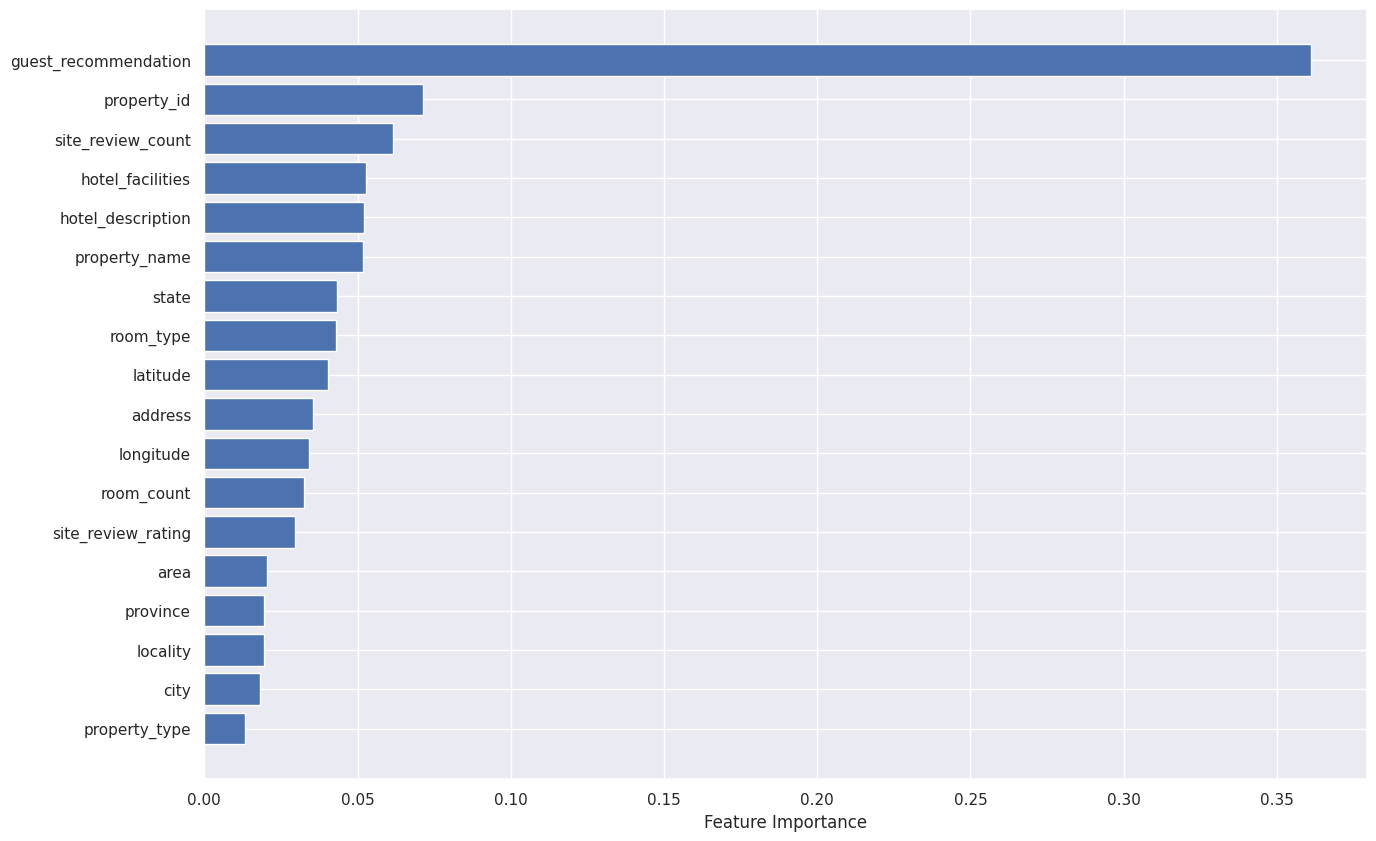

In [18]:
plt.figure(figsize=(15,10))
sort = forest.feature_importances_.argsort()
plt.barh(data_norm.columns[sort], forest.feature_importances_[sort])
plt.xlabel("Feature Importance")

## 2. Correlation matrix

In [19]:
# Correlation matrix
data_norm.corr()

address      area      city  guest_recommendation  \
address               1.000000  0.114702  0.132766             -0.012108   
area                  0.114702  1.000000  0.092166              0.031544   
city                  0.132766  0.092166  1.000000              0.028441   
guest_recommendation -0.012108  0.031544  0.028441              1.000000   
hotel_description    -0.039966  0.005827  0.003127             -0.065130   
hotel_facilities      0.100397  0.045025  0.036372              0.019865   
latitude              0.080850  0.099755  0.026101             -0.041128   
locality              0.114702  1.000000  0.092166              0.031544   
longitude            -0.007714  0.026015  0.027888             -0.067413   
property_id           0.016971  0.023608  0.012653              0.042410   
property_name         0.025922  0.041141  0.018916              0.029328   
property_type         0.092282  0.064665  0.055275              0.028896   
province              0.132766  0.092166  1.000000              0.028441   
room_count            0.027455 -0.000278 -0.008341              0.011002   
room_type            -0.030963  0.004184  0.023042              0.015102   
site_review_count    -0.038499 -0.047548  0.000700              0.075590   
site_review_rating   -0.000085 -0.003676  0.022095              0.544301   
state                -0.011777  0.061504  0.049393             -0.012492   
uniq_id               0.031303 -0.031552 -0.009771             -0.005524   

                      hotel_description  hotel_facilities  latitude  locality  \
address                       -0.039966          0.100397  0.080850  0.114702   
area                           0.005827          0.045025  0.099755  1.000000   
city                           0.003127          0.036372  0.026101  0.092166   
guest_recommendation          -0.065130          0.019865 -0.041128  0.031544   
hotel_description              1.000000         -0.150461  0.150035  0.005827   
hotel_facilities              -0.150461          1.000000 -0.100799  0.045025   
latitude                       0.150035         -0.100799  1.000000  0.099755   
locality                       0.005827          0.045025  0.099755  1.000000   
longitude                      0.095467         -0.046937 -0.017601  0.026015   
property_id                    0.014461          0.094480  0.024596  0.023608   
property_name                 -0.001562         -0.017063  0.002933  0.041141   
property_type                 -0.129235          0.194086 -0.135767  0.064665   
province                       0.003127          0.036372  0.026101  0.092166   
room_count                     0.014304         -0.011543  0.001598 -0.000278   
room_type                      0.013576          0.029341 -0.010463  0.004184   
site_review_count             -0.034609         -0.075554 -0.028052 -0.047548   
site_review_rating            -0.117650         -0.019283 -0.047139 -0.003676   
state                          0.009391          0.010614  0.085554  0.061504   
uniq_id                       -0.021154         -0.000781 -0.006163 -0.031552   

                      longitude  property_id  property_name  property_type  \
address               -0.007714     0.016971       0.025922       0.092282   
area                   0.026015     0.023608       0.041141       0.064665   
city                   0.027888     0.012653       0.018916       0.055275   
guest_recommendation  -0.067413     0.042410       0.029328       0.028896   
hotel_description      0.095467     0.014461      -0.001562      -0.129235   
hotel_facilities      -0.046937     0.094480      -0.017063       0.194086   
latitude              -0.017601     0.024596       0.002933      -0.135767   
locality               0.026015     0.023608       0.041141       0.064665   
longitude              1.000000     0.015985      -0.013364      -0.023331   
property_id            0.015985     1.000000       0.036398      -0.146997   
property_name         -

<Axes: >

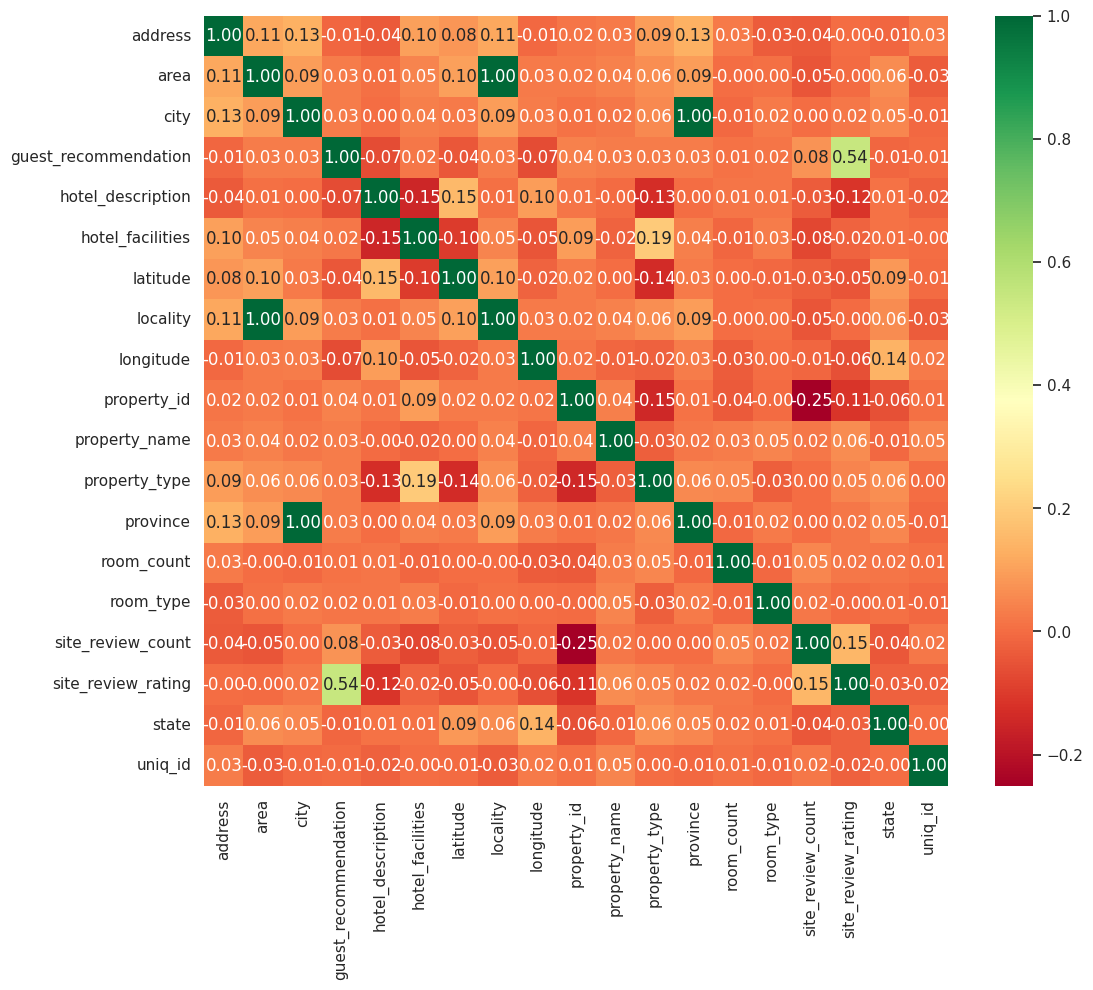

In [20]:
# heatmap of the same correlation matrix for better understanding.
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", fmt= '.2f')

## 3. SHAP
### Run Notebook with GPU runtime for faster processing

In [21]:
%%time
%time
explainer = shap.TreeExplainer(forest)
%time
shap_values = explainer.shap_values(X_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
CPU times: user 1min 6s, sys: 287 ms, total: 1min 6s
Wall time: 1min 6s


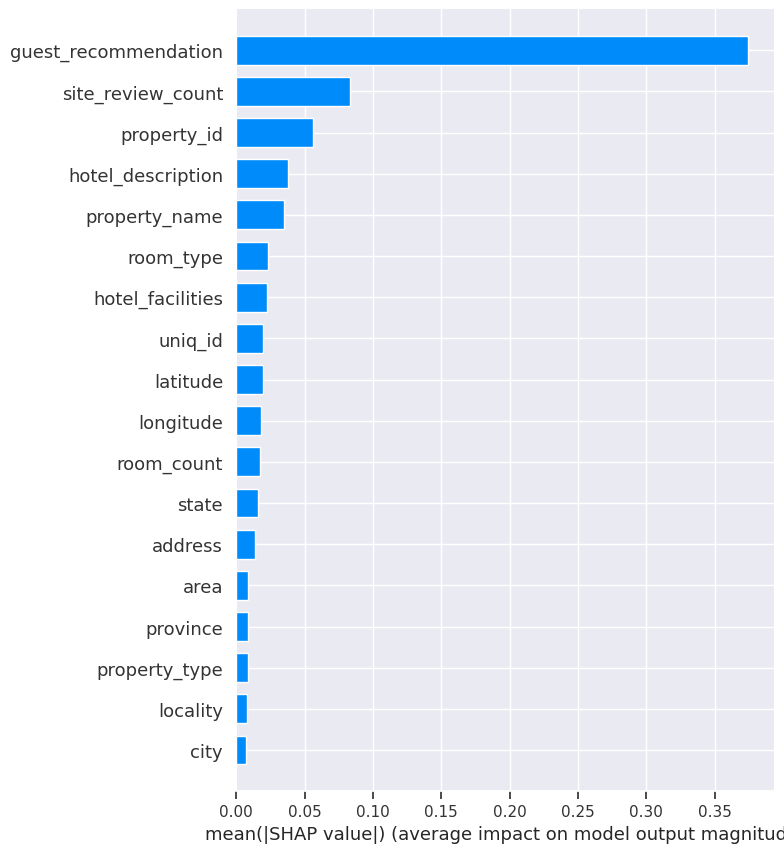

In [22]:
shap.summary_plot(shap_values, features=X_train, feature_names=X.columns, plot_type='bar')

 Q4 Answer : Based on these we conlude to use the following independent variables as most important feature to train the model.

 ['guest_recomendation', 'site_review_count', 'hotel description', 'property_id, 'property_name' ,'room_type' ,'site_review_rating']


### Q7 Predictor Variable dependent on other predictor variable

Answer : No, as we can see from the correlation matrix, several columns are significantly connected with one another. Therefore, we can eliminate those identical predictor variables (features).

In [23]:
new_df = data_norm[["guest_recommendation", "site_review_count", "hotel_description", "property_id", "property_name" , "room_type" , "hotel_facilities", "state", "site_review_rating"]]
new_df = new_df.drop_duplicates()

### Going forward our new_df is the normalized and reduced feature df, which will be used for further analysis

### Q8 Which predictor variables are the most important?

Answer : We can observe from the random forest regressor that the most significant variables are site_review_count and guest_recommendation.

### Q5 Which independent variables have missing data? How much?
Answer : No, there are no missing data for independent variables.

In [24]:


X = new_df.drop(columns = ['site_review_rating'])
y = new_df['site_review_rating']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)


train_df = pd.DataFrame(data = X_train,columns = X_train.columns)
train_df['site_review_rating'] = y_train



test_df = pd.DataFrame(data = X_test,columns = X_test.columns)
test_df['site_review_rating'] = y_test

print(new_df.columns[:-1].values)
check_df = pd.merge(
    train_df,
    test_df,
    on=["guest_recommendation", "site_review_count", "hotel_description", "property_id", "property_name" , "room_type" , "hotel_facilities", "state"],
    how="left",
    indicator="Exist",
)

# print(check_df.describe())
# check_df.drop(["Class_x",'Class_y'], inplace=True, axis=1)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(check_df["Exist"].value_counts())  # This code prints the number of unique data rows in training colomns

['guest_recommendation' 'site_review_count' 'hotel_description'
 'property_id' 'property_name' 'room_type' 'hotel_facilities' 'state']
Exist
False    1542
Name: count, dtype: int64


### Q6 Do the training and test sets have the same data?

Answer : The code above determines whether every row in the testing dataset is present in the training dataset. It returns true if the answer is yes; else, it returns false. Here, the result is 1542 False, indicating that each data point in the training and testing sets is unique.


### Q7  In the predictor variables independent of all the other predictor variables?

Answer : No, The independent variables are dependent to other predictor variables.

### Q10 What are the distributions of the predictor variables?   
Answer : Since all predictor variables are numerical, we can assess the distribution of predictor variables by examining the distribution of all the numerical data.

## Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

## Removing Outliers by filtering data outside the inter quartile range

In [25]:
cols = new_df.columns[:-1].values
Q1 = new_df[cols].quantile(0.25)
Q3 = new_df[cols].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
print('InterQuartile Range\n',IQR)
# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# IQR['Solidity']

rm_outlier_df = new_df
for col in cols:
  print(col)
  filter = (rm_outlier_df[col] >= Q1[col] - 1.5 * IQR[col]) & (rm_outlier_df[col] <= Q3[col] + 1.5 *IQR[col])
  rm_outlier_df = rm_outlier_df.loc[filter]
print('new_df shape',new_df.shape)

print('rm_outlier_df',rm_outlier_df.shape)

InterQuartile Range
 guest_recommendation      22.00
site_review_count         53.00
hotel_description        588.00
property_id             1150.50
property_name           1060.50
room_type                430.75
hotel_facilities        1084.50
state                     12.00
dtype: float64
guest_recommendation
site_review_count
hotel_description
property_id
property_name
room_type
hotel_facilities
state
new_df shape (2302, 9)
rm_outlier_df (1973, 9)


In [26]:
rm_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1973 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guest_recommendation  1973 non-null   int64  
 1   site_review_count     1973 non-null   int64  
 2   hotel_description     1973 non-null   int64  
 3   property_id           1973 non-null   int64  
 4   property_name         1973 non-null   int64  
 5   room_type             1973 non-null   int64  
 6   hotel_facilities      1973 non-null   int64  
 7   state                 1973 non-null   int64  
 8   site_review_rating    1973 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 154.1 KB


Reference: https://datascience.stackexchange.com/questions/54808/how-to-remove-outliers-using-box-plot

## Q12 Removing Data randomly

### 1% Data Removal



In [27]:
p = 0.01
mask = np.random.choice([True, False], size=new_df.shape, p=[p,1-p])
nan_1p_df = new_df.mask(mask)

In [28]:
nan_1p_df.info()
#We can see 1% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guest_recommendation  2281 non-null   float64
 1   site_review_count     2276 non-null   float64
 2   hotel_description     2277 non-null   float64
 3   property_id           2281 non-null   float64
 4   property_name         2284 non-null   float64
 5   room_type             2281 non-null   float64
 6   hotel_facilities      2274 non-null   float64
 7   state                 2268 non-null   float64
 8   site_review_rating    2287 non-null   float64
dtypes: float64(9)
memory usage: 162.0 KB


### 5% Data Removal

In [29]:
p = 0.05
mask = np.random.choice([True, False], size=new_df.shape, p=[p,1-p])
nan_5p_df = new_df.mask(mask)
nan_5p_df.info()
#We can see 5% data is made null as non null values are not same as total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guest_recommendation  2175 non-null   float64
 1   site_review_count     2184 non-null   float64
 2   hotel_description     2175 non-null   float64
 3   property_id           2168 non-null   float64
 4   property_name         2173 non-null   float64
 5   room_type             2190 non-null   float64
 6   hotel_facilities      2183 non-null   float64
 7   state                 2180 non-null   float64
 8   site_review_rating    2187 non-null   float64
dtypes: float64(9)
memory usage: 162.0 KB


### 10% Data removal

In [30]:
p = 0.1
mask = np.random.choice([True, False], size=new_df.shape, p=[p,1-p])
nan_10p_df = new_df.mask(mask)
print(nan_10p_df.info())
#We can see 10% data is made null as non null values are not same as total entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guest_recommendation  2074 non-null   float64
 1   site_review_count     2069 non-null   float64
 2   hotel_description     2079 non-null   float64
 3   property_id           2082 non-null   float64
 4   property_name         2080 non-null   float64
 5   room_type             2085 non-null   float64
 6   hotel_facilities      2059 non-null   float64
 7   state                 2062 non-null   float64
 8   site_review_rating    2048 non-null   float64
dtypes: float64(9)
memory usage: 162.0 KB
None


### Data Imputation

#### 1. With Mean values

In [31]:
nan_10p_df_mean = nan_10p_df.fillna(nan_10p_df.mean())
nan_1p_df_mean = nan_1p_df.fillna(nan_1p_df.mean())
nan_5p_df_mean = nan_5p_df.fillna(nan_5p_df.mean())


#### 2. Dropping these Nan values

In [32]:
nan_10p_df_drop = nan_10p_df.dropna()
print('nan_10p_df_drop shape:',nan_10p_df_drop.shape)
nan_1p_df_drop = nan_1p_df.dropna()
print('nan_1p_df_drop shape:',nan_1p_df_drop.shape)
nan_5p_df_drop = nan_5p_df.dropna()
print('nan_5p_df_drop shape:',nan_5p_df_drop.shape)


nan_10p_df_drop shape: (889, 9)
nan_1p_df_drop shape: (2101, 9)
nan_5p_df_drop shape: (1391, 9)


#### 3. Fill with KNN

In [33]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset

def impute_knn(impute_df,imputer):

  X = impute_df
  imputer.fit(X)
  Xtrans = imputer.transform(X)

  res_df = pd.DataFrame(data=Xtrans, columns = impute_df.columns[:])

  return res_df

nan_1p_df_knn = impute_knn(nan_1p_df, imputer)
nan_5p_df_knn = impute_knn(nan_5p_df, imputer)
nan_10p_df_knn = impute_knn(nan_10p_df, imputer)





Reference: https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

#### Check how well imputer mean

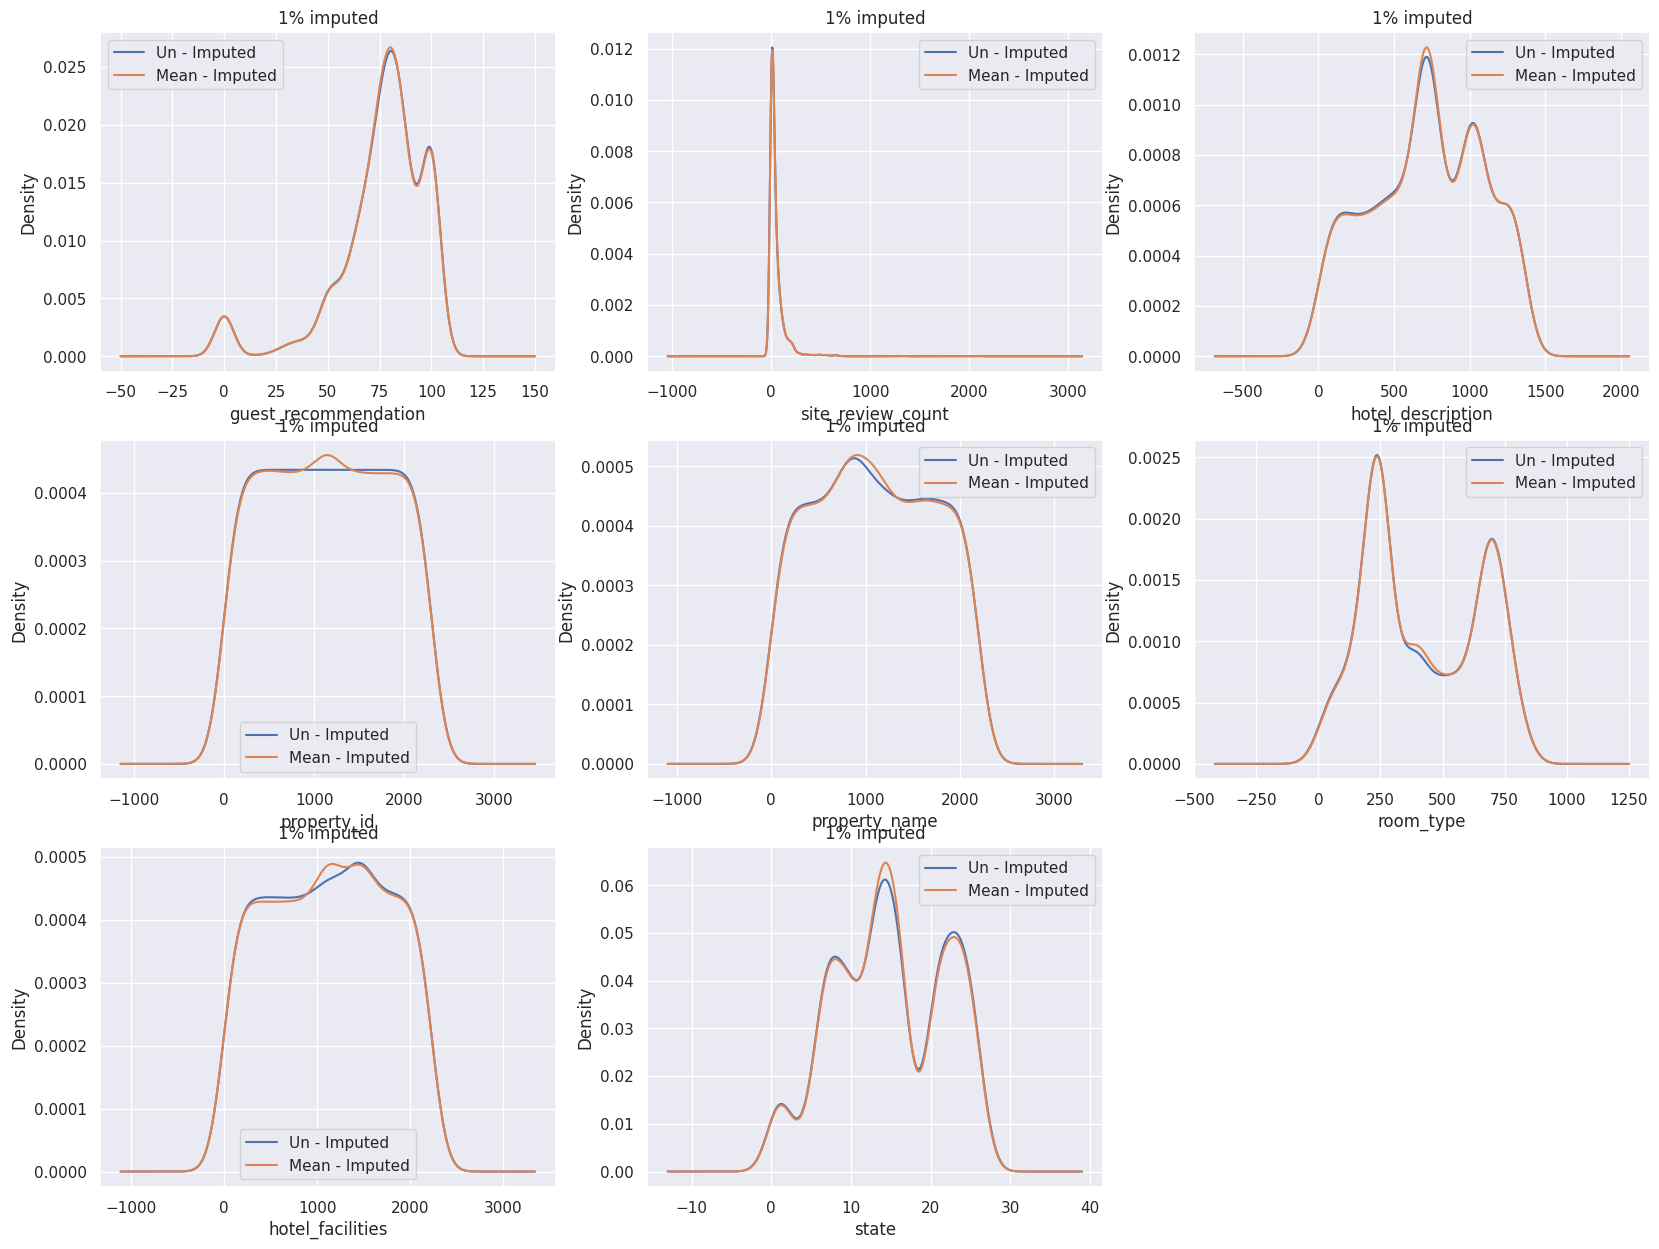

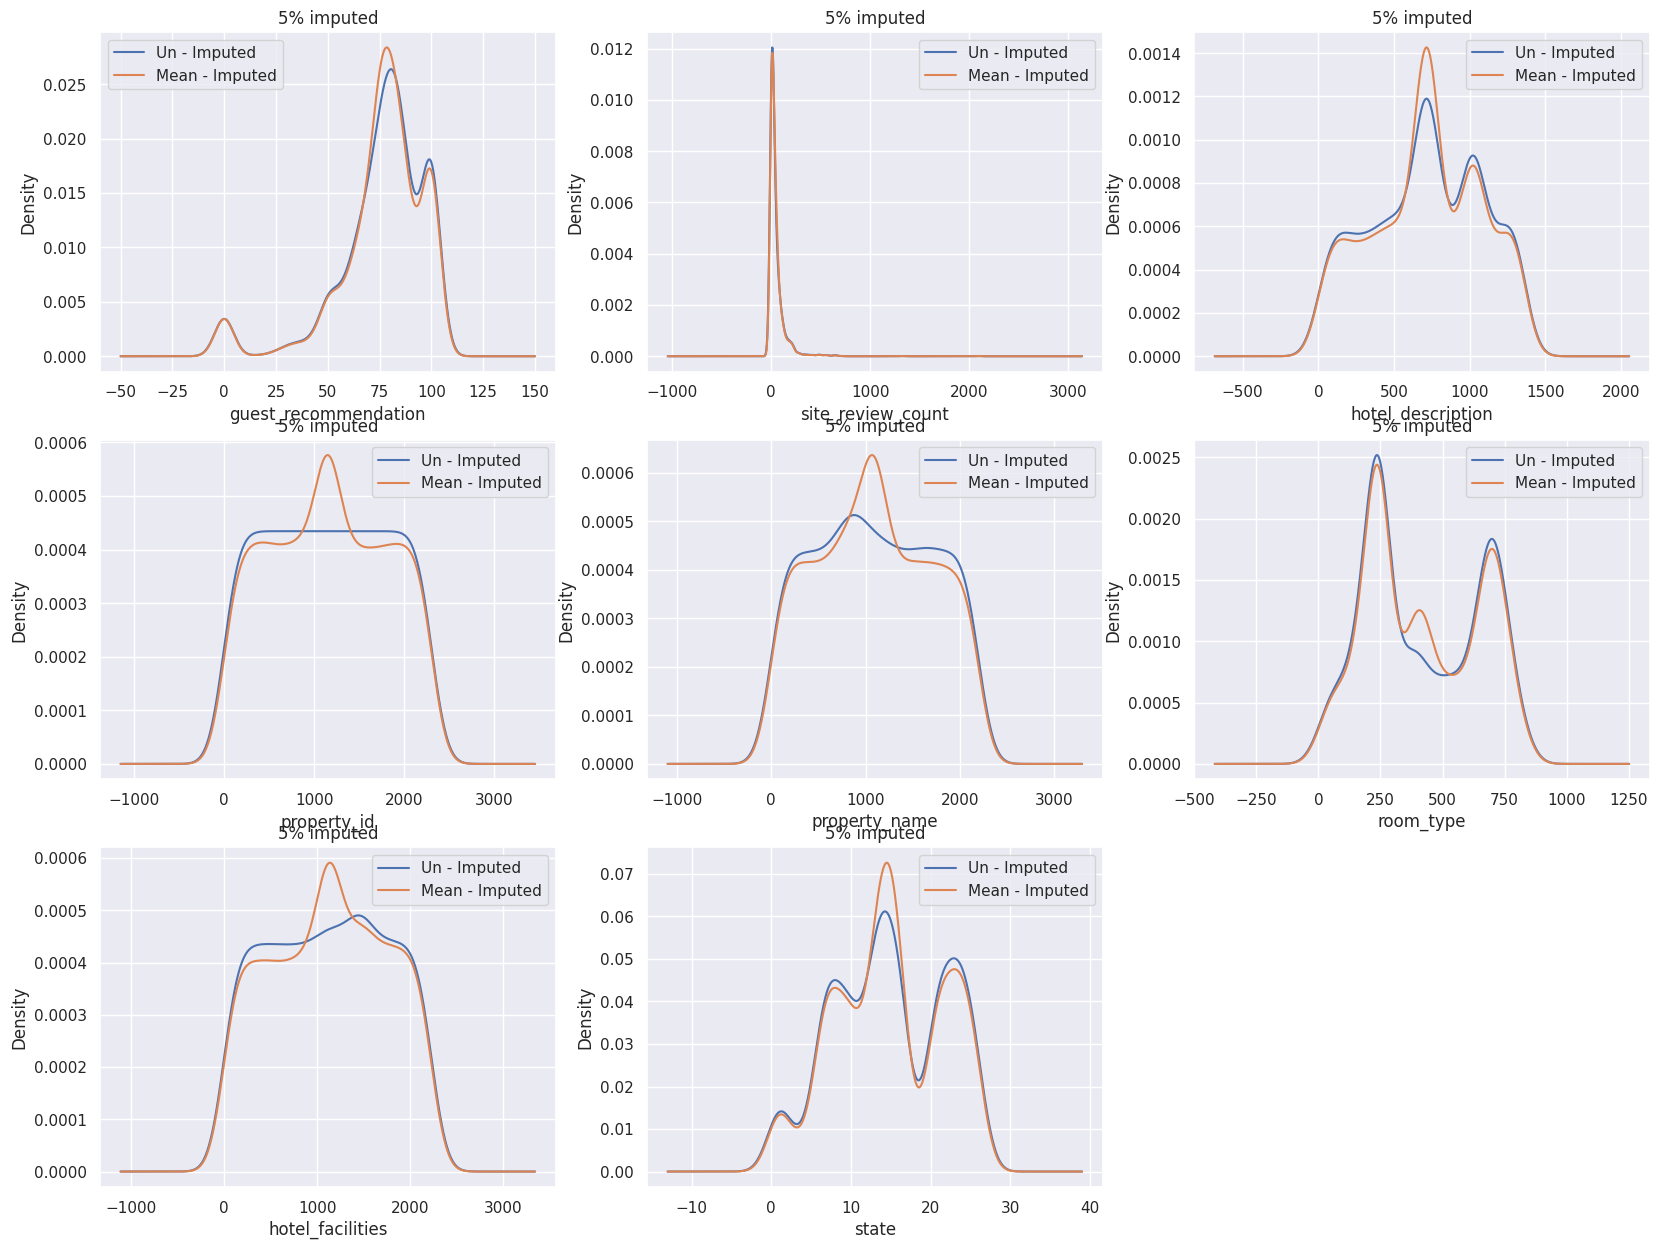

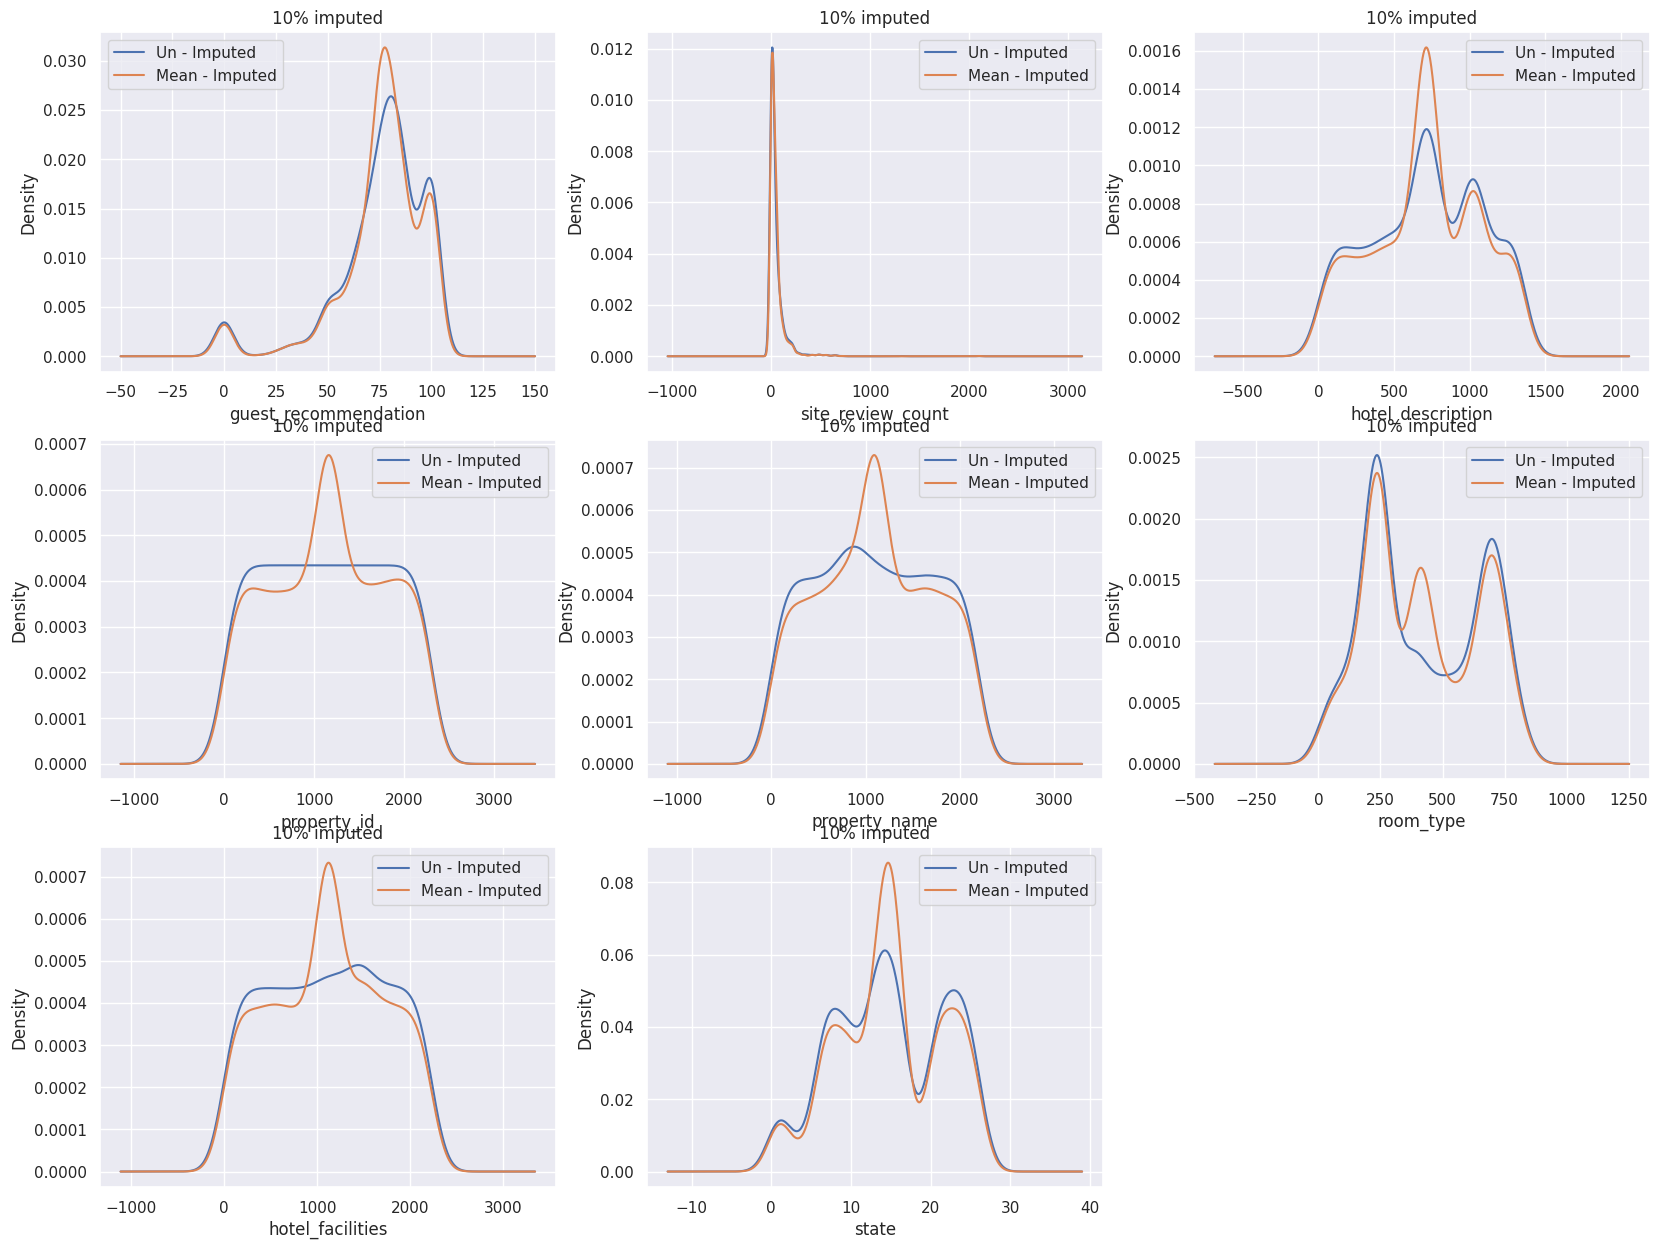

In [34]:
#1% data

plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_1p_df_mean[col].plot(kind="kde")
  plt.title('1% imputed')
  plt.legend(["Un - Imputed", "Mean - Imputed"])
  plt.xlabel(f"{col}")



#5% data
plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_5p_df_mean[col].plot(kind="kde")
  plt.title('5% imputed')
  plt.legend(["Un - Imputed", "Mean - Imputed"])
  plt.xlabel(f"{col}")


#10% data
plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_10p_df_mean[col].plot(kind="kde")
  plt.title('10% imputed')
  plt.legend(["Un - Imputed", "Mean - Imputed"])
  plt.xlabel(f"{col}")


#### Check how well imputer drop

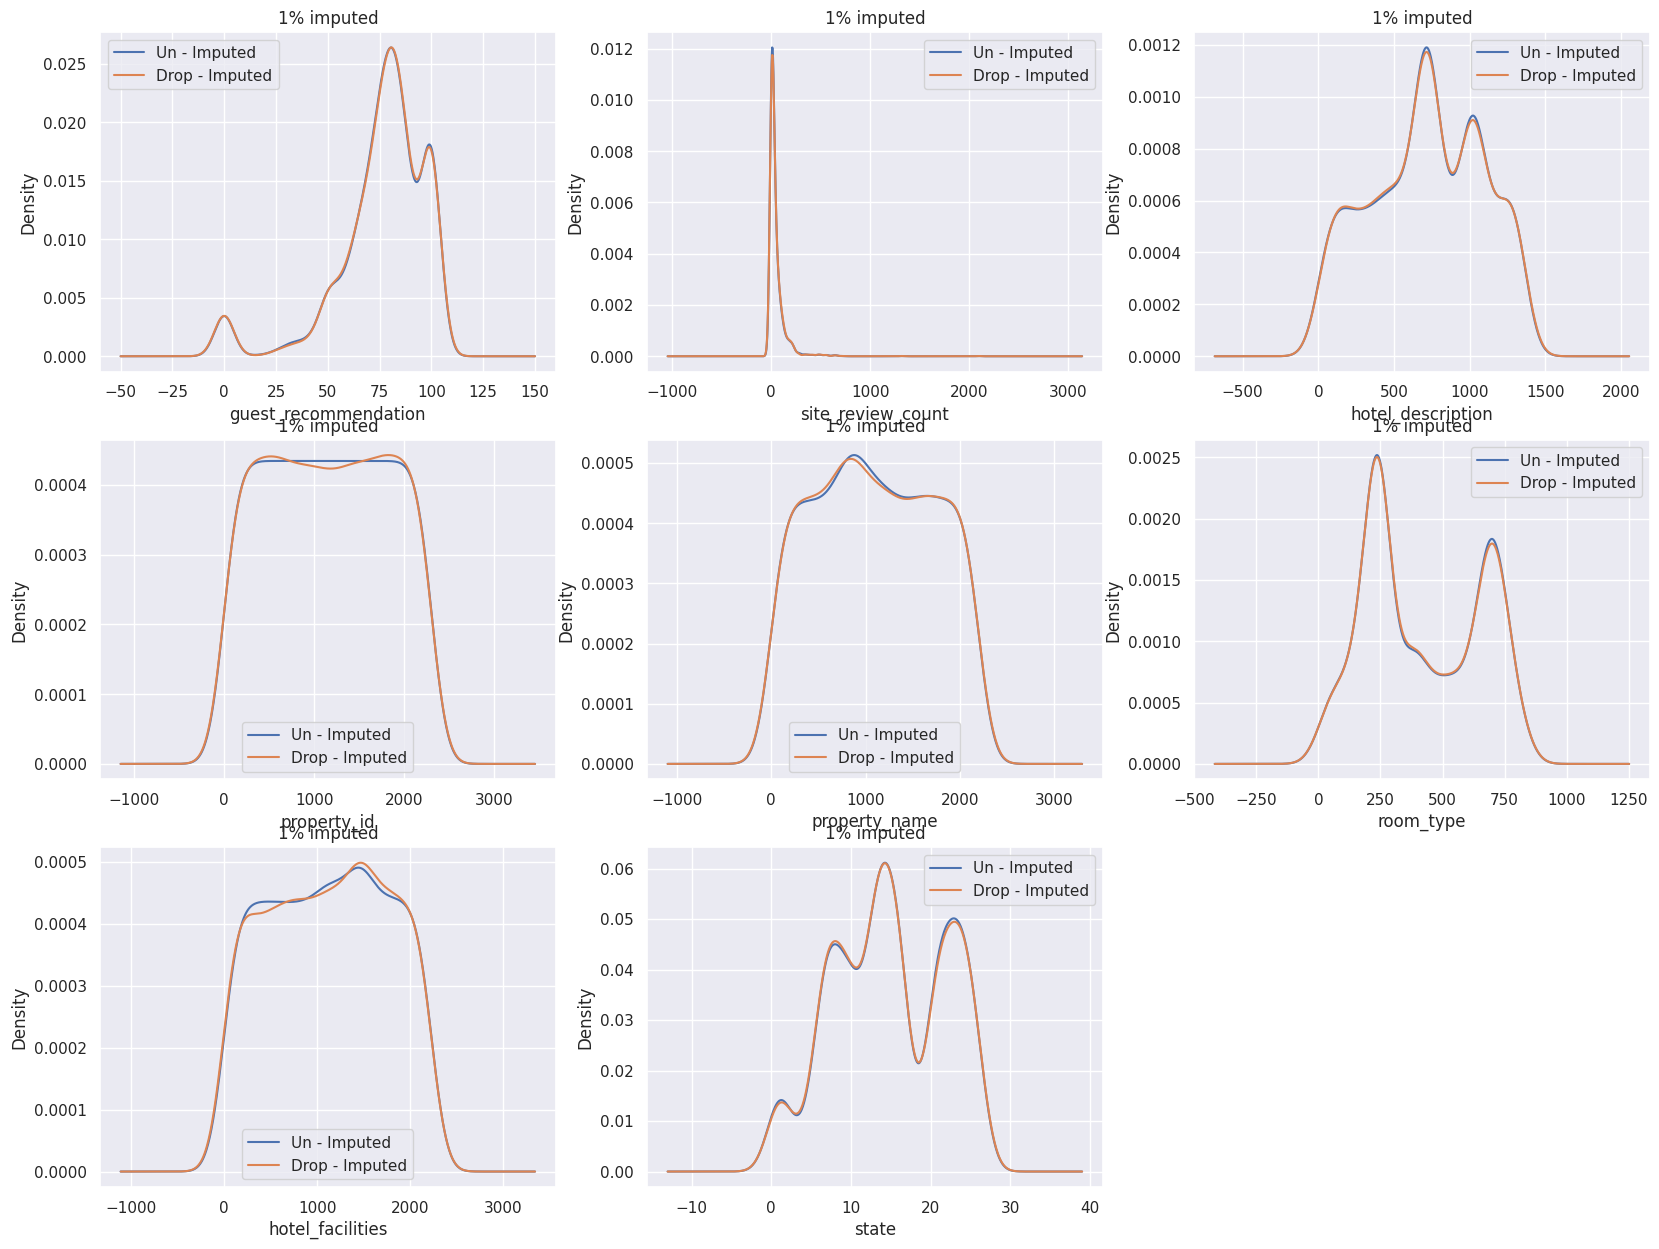

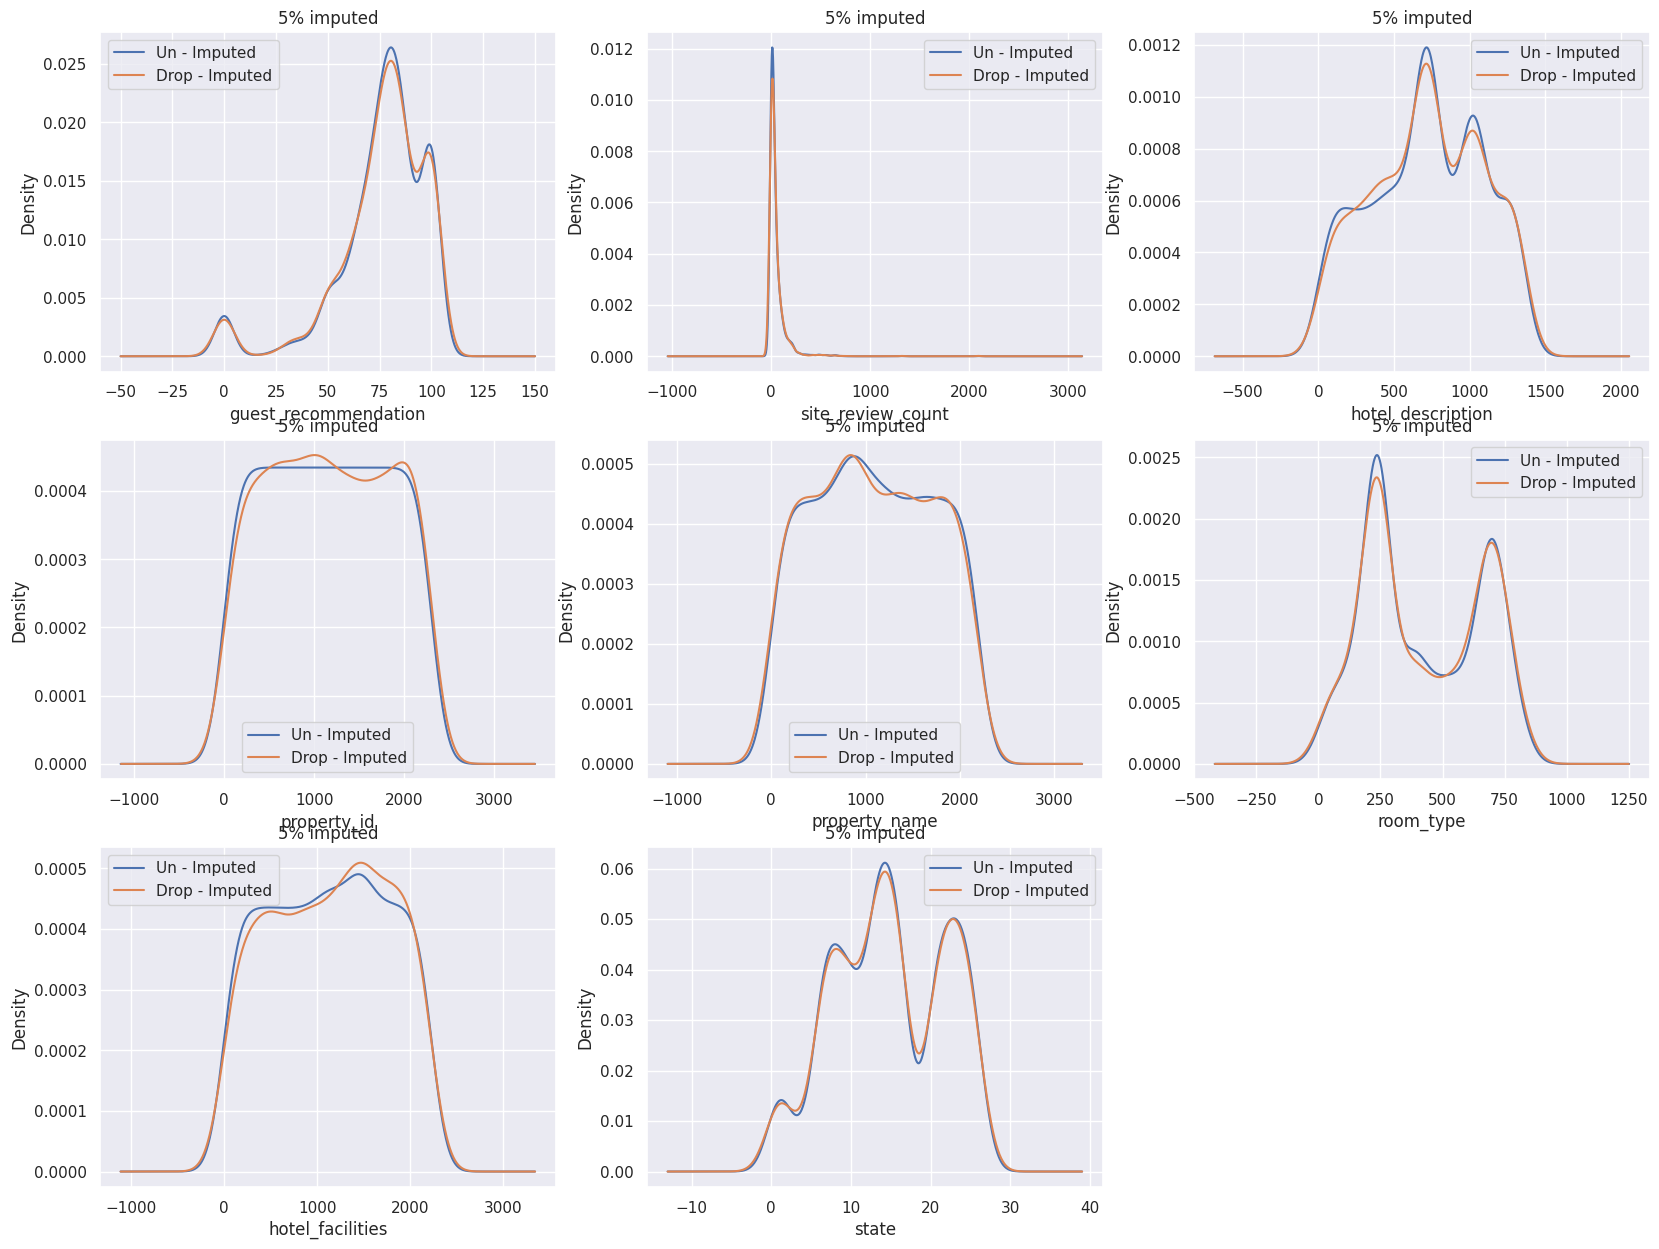

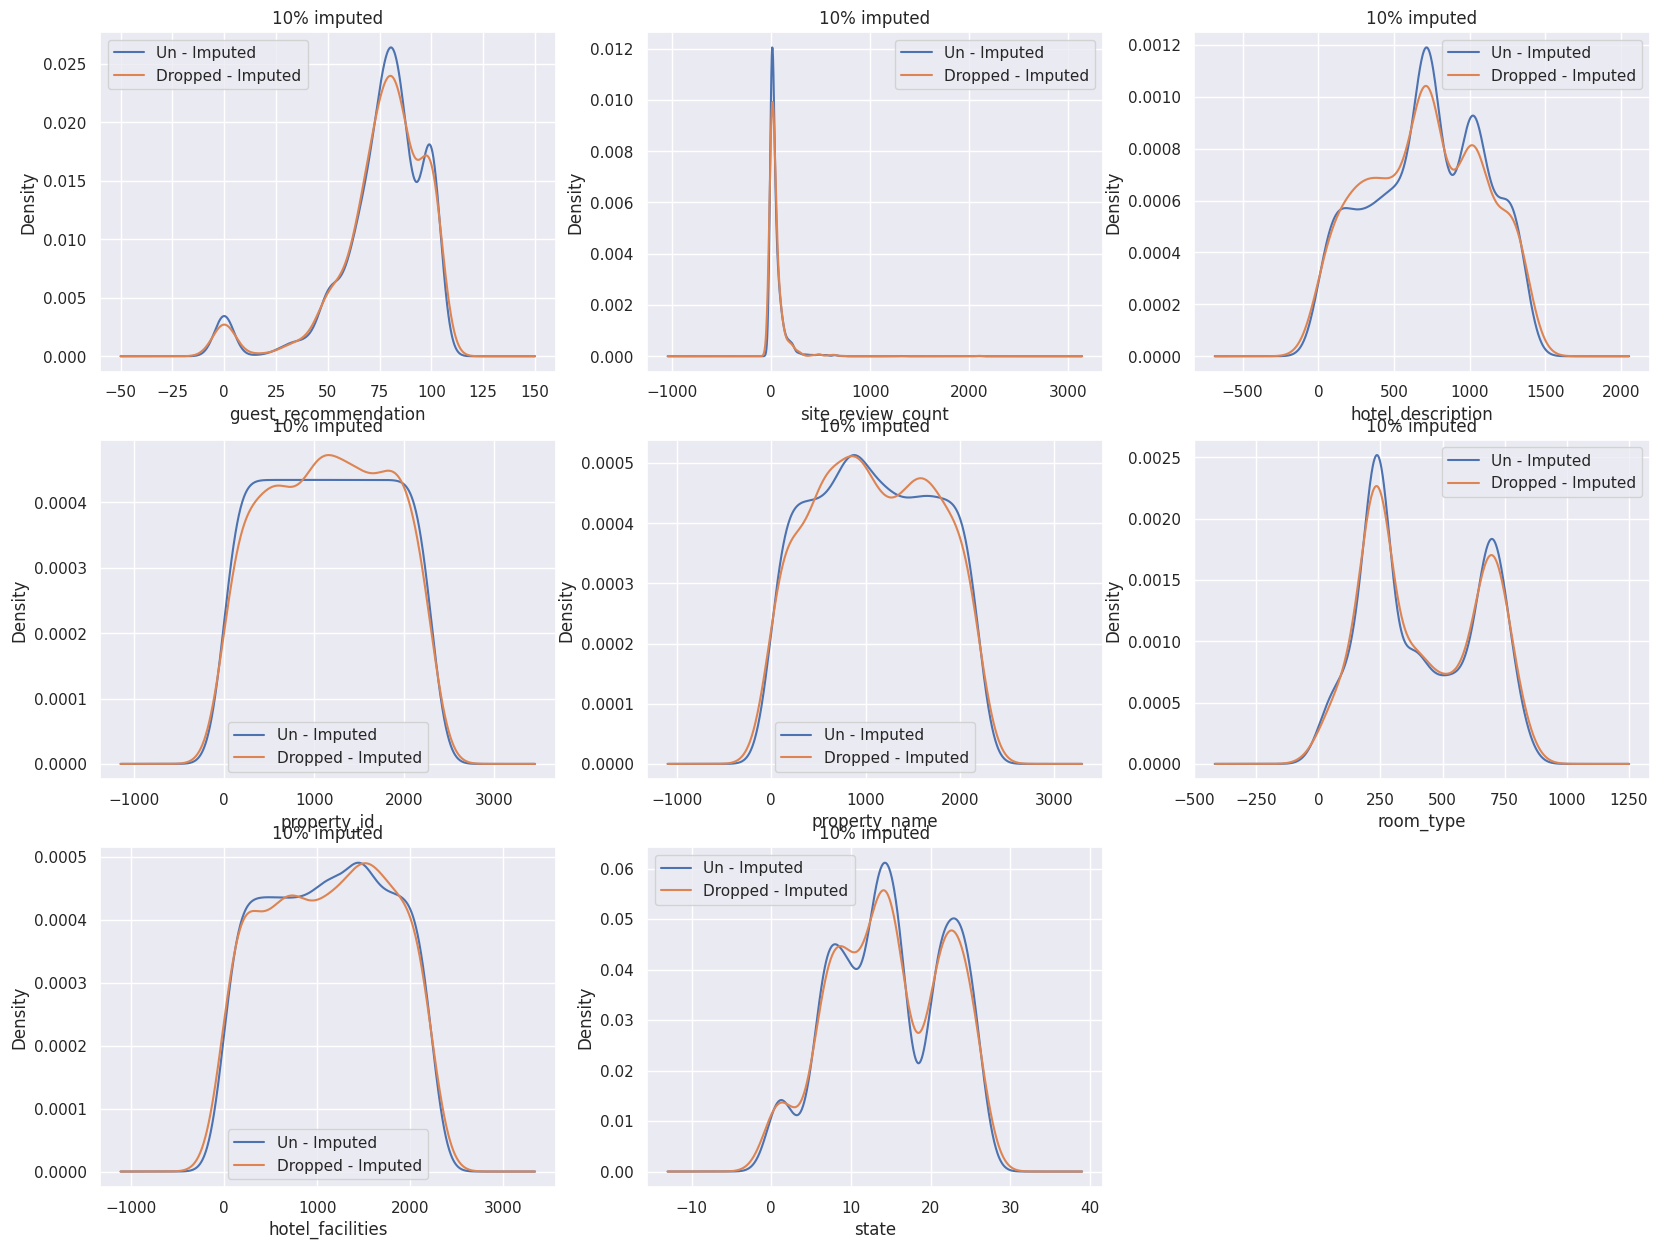

In [35]:
#1% data

plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_1p_df_drop[col].plot(kind="kde")
  plt.title('1% imputed')
  plt.legend(["Un - Imputed", "Drop - Imputed"])
  plt.xlabel(f"{col}")



#5% data
plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_5p_df_drop[col].plot(kind="kde")
  plt.title('5% imputed')
  plt.legend(["Un - Imputed", "Drop - Imputed"])
  plt.xlabel(f"{col}")


#10% data
plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_10p_df_drop[col].plot(kind="kde")
  plt.title('10% imputed')
  plt.legend(["Un - Imputed", "Dropped - Imputed"])
  plt.xlabel(f"{col}")


#### Checking how well impute : KNN

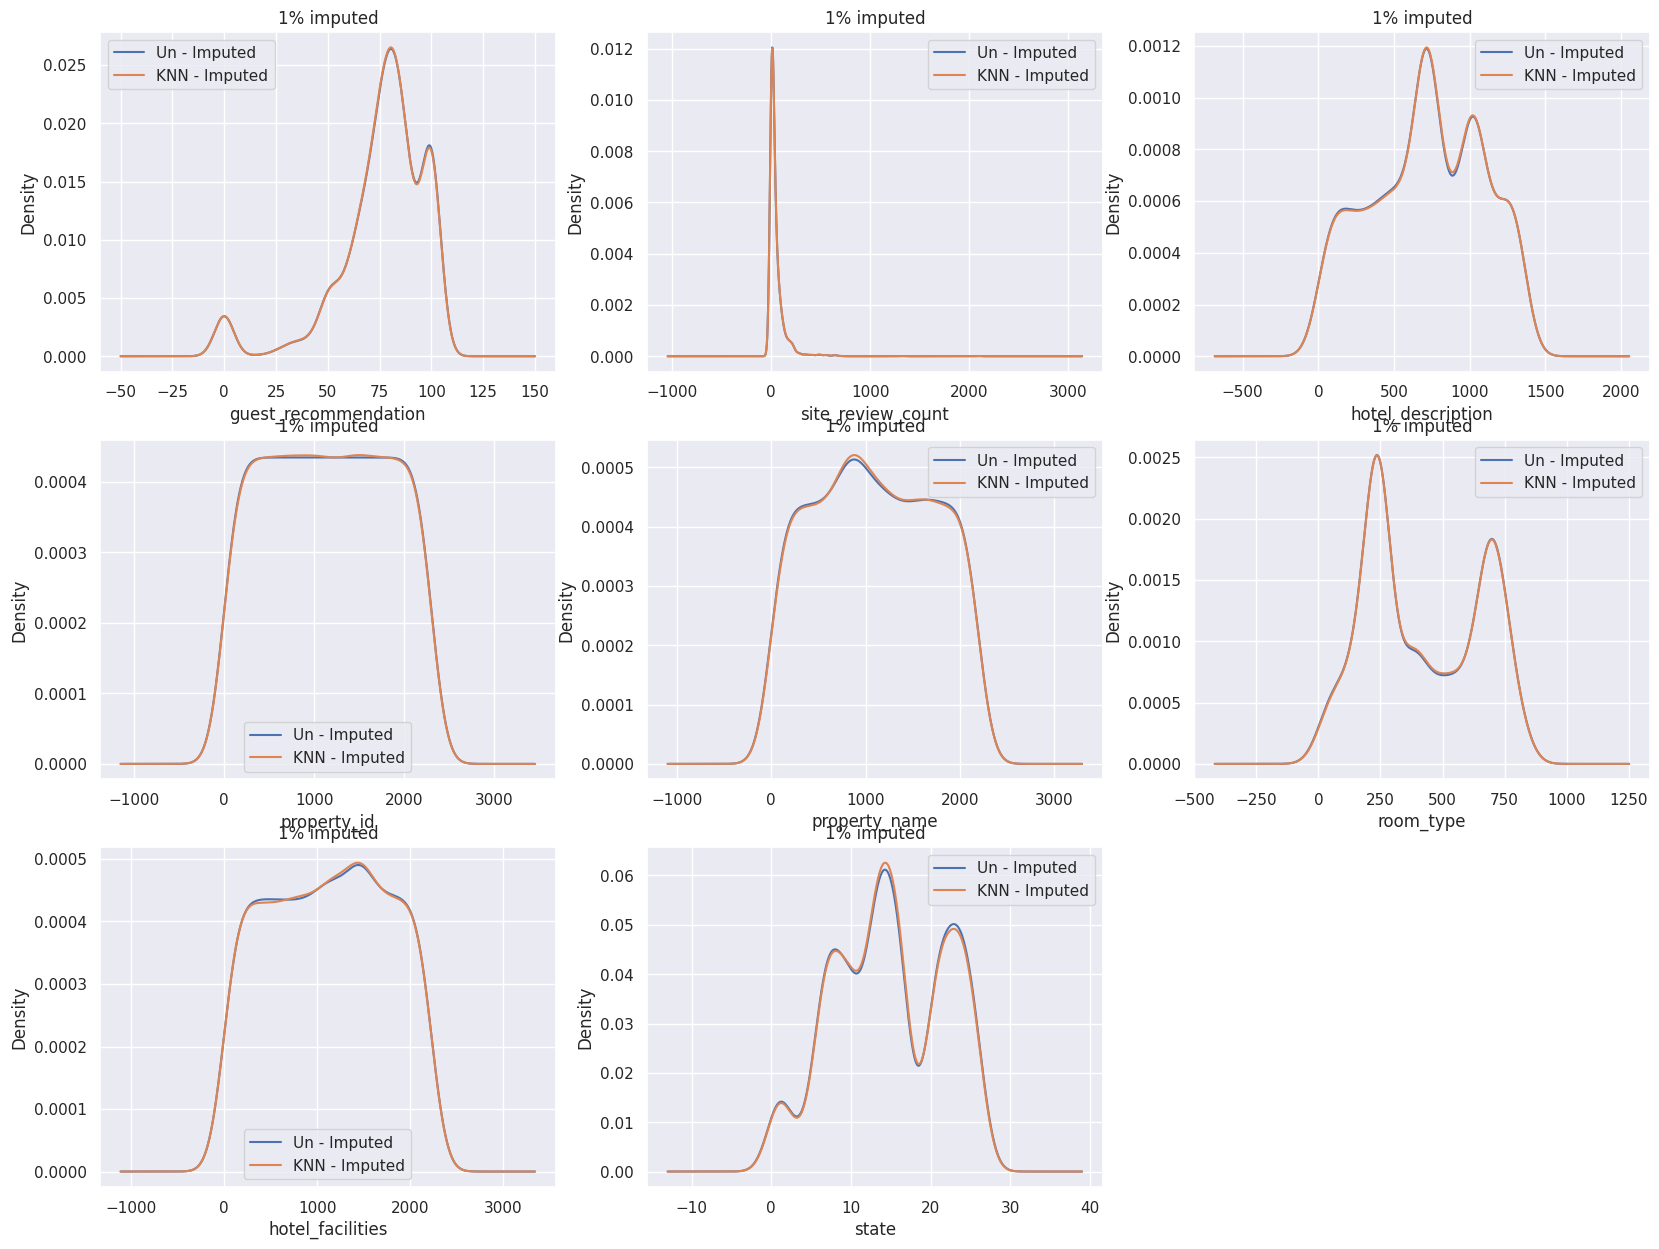

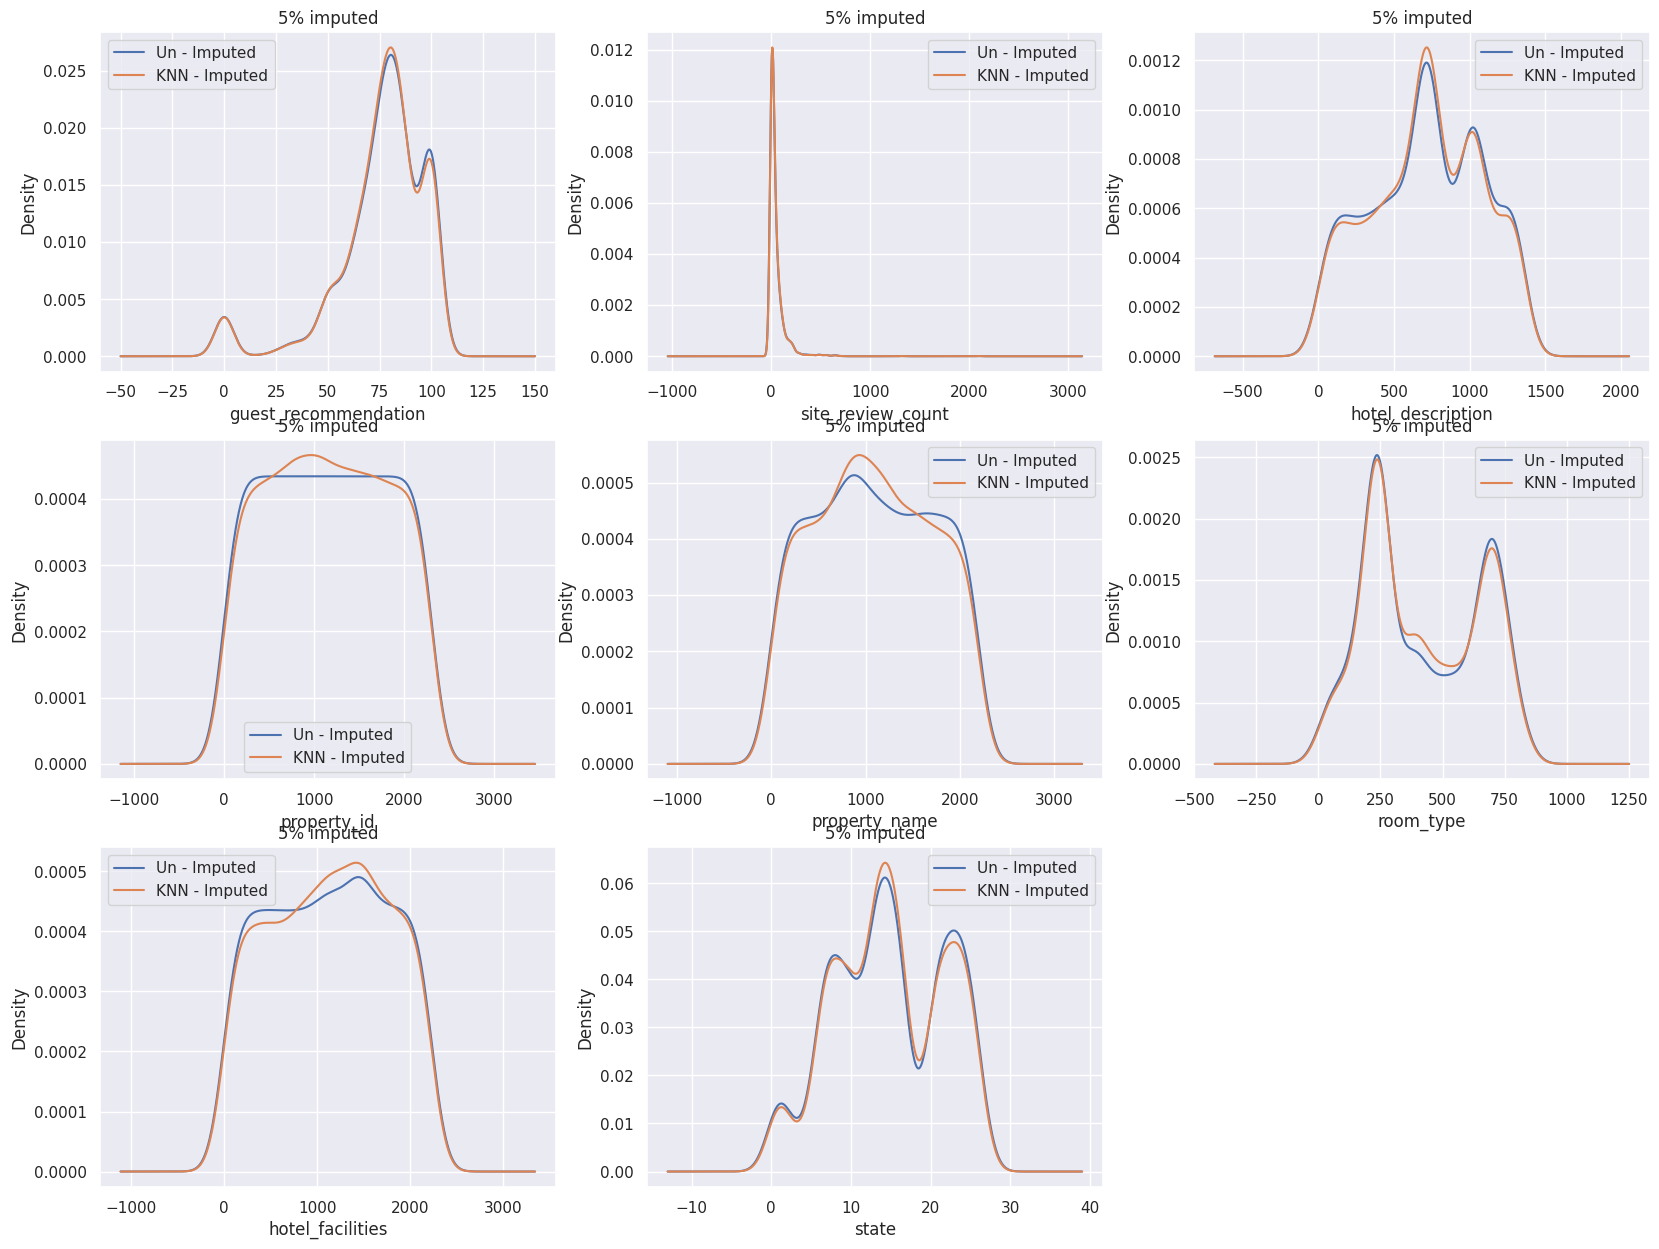

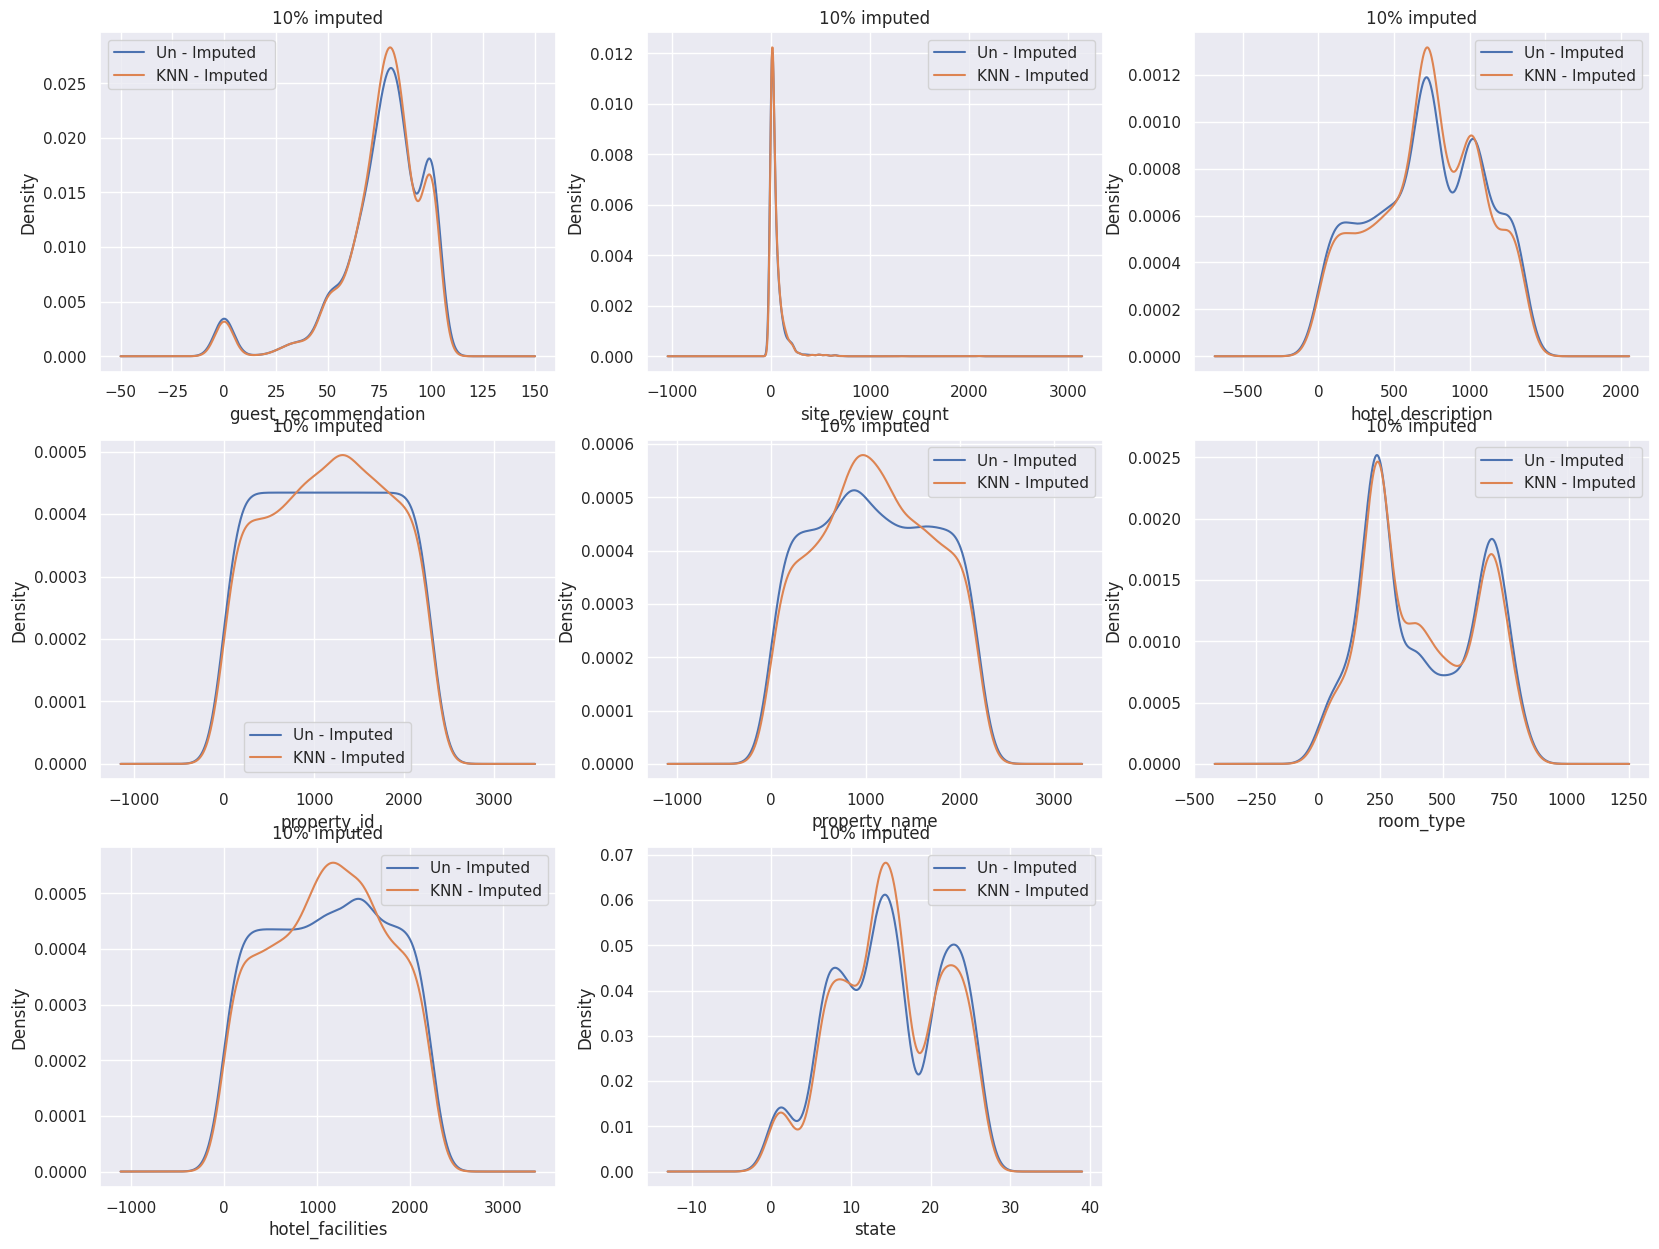

In [36]:

#1% data

plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_1p_df_knn[col].plot(kind="kde")
  plt.title('1% imputed')
  plt.legend(["Un - Imputed", "KNN - Imputed"])
  plt.xlabel(f"{col}")



#5% data
plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_5p_df_knn[col].plot(kind="kde")
  plt.title('5% imputed')
  plt.legend(["Un - Imputed", "KNN - Imputed"])
  plt.xlabel(f"{col}")



plt.figure(figsize=(20,15))

i = 0
for col in cols[:]:
  plt.subplot(3,3,i+1)
  i+=1
  new_df[col].plot(kind="kde")
  nan_10p_df_knn[col].plot(kind="kde")
  plt.title('10% imputed')
  plt.legend(["Un - Imputed", "KNN - Imputed"])
  plt.xlabel(f"{col}")



1. Looking at the distribution of imputed data we can observe when imputation is less i.e. 1% then any method works fine for my dataset but as the amount increases to 5% and then to 10% taking ***mean*** to replace values causes huge variance.
2. ***Dropping*** the missing data doesn't affect the distribution much but we lose out on valuable training data which is observed by looking at the shape of imputed dataframe.
3. For my dataset use of *KNN* to replace values works best when compared it with original data. Hence we should use KNN for this dataset.


Reference: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb

In [37]:
# model training
df = new_df[["guest_recommendation", "site_review_count", "hotel_description", "property_id", "property_name" , "room_type", "site_review_rating"]]

X = df.drop(columns=["site_review_rating"])
y = df['site_review_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
clf.score(X_test, y_test)

0.2741706521237195

###Answer: From Above score we see that Accuracy is 27%

In [39]:
# rm_outlier_df
# After removing outliers Model traing

df = rm_outlier_df[["guest_recommendation", "site_review_count", "hotel_description", "property_id", "property_name" , "room_type", "site_review_rating"]]

X = df.drop(columns=["site_review_rating"])
y = df['site_review_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestRegressor()# SVC(gamma='auto')
clf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
clf.score(X_test, y_test)

0.18007969709834082

## Q11 Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Answer :  After removing outliers, we can see that the accuracy dropped by 9%.

# Conclusion

For this dataset the regression analysis techniques were used like linear model. Plotted Graphs, heatmaps, lime, shap On the other hand when Linear Regression was implemented the accuracy for training data. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, feature importance bar chart and many more plots.

The important features for this model was guest recommendation. This means that for this model the target variable 'Site_review_rating' is highly depended on hotel_description, property_id, property_name, guest_recommendation site_review_count.

Type Markdown and LaTeX:  𝛼2